# Load Libraries

In [132]:
# Import packages/libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score # Sklearn package's randomized data splitting function
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer

# to display graphs in Jupyter notebook
%matplotlib inline       
#from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Load and Explore the Data

In [3]:
data1 = pd.read_csv("Marketing Project-Data Dictionary.csv")
data2 = pd.read_csv("Marketing Project-Flight data.csv")
data3 = pd.read_csv("Marketing Project-Survey data.csv")


In [4]:
df1 = data1.copy()
df1.shape

(30, 11)

In [5]:
df2 = data2.copy()
df2.shape

(90917, 9)

In [6]:
df3 = data3.copy()
df3.shape

(90917, 16)

In [7]:
df1.head()

,Unnamed: 0,Seat comfort,Unnamed: 2,Unnamed: 3,Departure/Arrival time convenient,Unnamed: 5,Unnamed: 6,Food and drink,Unnamed: 8,Unnamed: 9,Gate location
0,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0.0,very inconvinient
1,1.0,poor,NaN,1.0,poor,NaN,1.0,poor,NaN,1.0,Inconvinient
2,2.0,need improvement,NaN,2.0,need improvement,NaN,2.0,need improvement,NaN,2.0,need improvement
3,3.0,acceptable,NaN,3.0,acceptable,NaN,3.0,acceptable,NaN,3.0,manageable
4,4.0,good,NaN,4.0,good,NaN,4.0,good,NaN,4.0,Convinient


In [8]:
df2.head()

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0


In [9]:
df3.head()

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


### Do outer merge Marketing Project-Flight data and Marketing Project-Survey data on the CustomerId column 

#### Rename CustomerId to CustomerID in df3 so both columns have same name for merging

In [10]:
df3.rename(columns = {'CustomerId':'CustomerID'},inplace = True)

In [11]:
df3.head()

,CustomerID,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [12]:
df_merged = pd.merge(df2, df3, on='CustomerID', how='outer')
  
# displaying result
df_merged.shape


(90917, 24)

### Check the number of rows and columns

In [13]:
df_merged.shape

(90917, 24)

### Check column names

In [14]:
df_merged.columns

Index(['CustomerID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

### Overview of Data

In [15]:
df_merged.head(10)

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,...,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,...,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,...,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement
5,149970,Female,Loyal Customer,66,Personal Travel,Eco,227,17,15.0,satisfied,...,need improvement,excellent,excellent,excellent,excellent,extremely poor,excellent,excellent,excellent,acceptable
6,149971,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,acceptable,acceptable,good,excellent,good,need improvement
7,149972,Male,Loyal Customer,22,Personal Travel,Eco,1556,30,26.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,need improvement,good,excellent,acceptable,good,need improvement
8,149973,Female,Loyal Customer,58,Personal Travel,Eco,104,47,48.0,satisfied,...,acceptable,acceptable,acceptable,acceptable,acceptable,extremely poor,poor,need improvement,acceptable,excellent
9,149974,Female,Loyal Customer,34,Personal Travel,Eco,3633,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,acceptable,need improvement,excellent,need improvement,excellent,need improvement


In [16]:
df_merged.tail(10)

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
90907,240872,Female,disloyal Customer,24,NaN,Eco,2039,0,0.0,satisfied,...,need improvement,good,need improvement,need improvement,good,excellent,excellent,excellent,good,need improvement
90908,240873,Female,disloyal Customer,30,Personal Travel,Eco,1961,0,0.0,satisfied,...,excellent,excellent,excellent,excellent,acceptable,need improvement,acceptable,good,good,excellent
90909,240874,Female,disloyal Customer,45,Personal Travel,Eco,1612,0,0.0,satisfied,...,need improvement,excellent,need improvement,need improvement,need improvement,excellent,good,acceptable,good,need improvement
90910,240875,Female,NaN,70,Personal Travel,Eco,1674,54,46.0,satisfied,...,excellent,excellent,excellent,excellent,acceptable,need improvement,good,excellent,good,excellent
90911,240876,Female,disloyal Customer,69,Personal Travel,Eco,2240,4,0.0,satisfied,...,good,excellent,good,good,excellent,good,good,acceptable,good,good
90912,240877,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,0.0,satisfied,...,need improvement,excellent,need improvement,need improvement,acceptable,excellent,acceptable,excellent,good,need improvement
90913,240878,Female,disloyal Customer,29,Personal Travel,Eco,1731,0,0.0,satisfied,...,need improvement,excellent,need improvement,need improvement,acceptable,acceptable,good,good,good,need improvement
90914,240879,Male,disloyal Customer,69,Personal Travel,Eco,2320,155,163.0,neutral or dissatisfied,...,acceptable,need improvement,need improvement,good,good,acceptable,good,need improvement,acceptable,need improvement
90915,240880,Male,disloyal Customer,66,Personal Travel,Eco,2450,193,205.0,neutral or dissatisfied,...,acceptable,need improvement,need improvement,acceptable,acceptable,need improvement,acceptable,need improvement,poor,need improvement
90916,240881,Female,disloyal Customer,38,Personal Travel,Eco,4307,185,186.0,neutral or dissatisfied,...,acceptable,acceptable,acceptable,good,excellent,excellent,excellent,acceptable,acceptable,acceptable


### Check column types and missing values

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90917 entries, 0 to 90916
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         90917 non-null  int64  
 1   Gender                             90917 non-null  object 
 2   CustomerType                       81818 non-null  object 
 3   Age                                90917 non-null  int64  
 4   TypeTravel                         81829 non-null  object 
 5   Class                              90917 non-null  object 
 6   Flight_Distance                    90917 non-null  int64  
 7   DepartureDelayin_Mins              90917 non-null  int64  
 8   ArrivalDelayin_Mins                90633 non-null  float64
 9   Satisfaction                       90917 non-null  object 
 10  Seat_comfort                       90917 non-null  object 
 11  Departure.Arrival.time_convenient  82673 non-null  obj

### OBSERVATIONS:

* Only 5 variables are numerical, the rest are object types.
* 6 columns have less than 90917 non null values so there must be missing values in them.

### Check columns with null values

In [18]:
df_merged.isnull().sum().sort_values(ascending = False)

CustomerType                         9099
TypeTravel                           9088
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Onboard_service                      7179
ArrivalDelayin_Mins                   284
Inflightwifi_service                    0
Cleanliness                             0
Checkin_service                         0
Baggage_handling                        0
Leg_room_service                        0
Ease_of_Onlinebooking                   0
Online_support                          0
Inflight_entertainment                  0
CustomerID                              0
Gate_location                           0
Gender                                  0
Seat_comfort                            0
Satisfaction                            0
DepartureDelayin_Mins                   0
Flight_Distance                         0
Class                                   0
Age                                     0
Online_boarding                   

### OBSERVATIONS:

* 6 columns have missing values

#### Check the percentage of missing values in each column


In [19]:
(df_merged.isnull().sum()/(len(df_merged))*100).sort_values(ascending = False)

CustomerType                         10.008029
TypeTravel                            9.995930
Departure.Arrival.time_convenient     9.067611
Food_drink                            8.998317
Onboard_service                       7.896213
ArrivalDelayin_Mins                   0.312373
Inflightwifi_service                  0.000000
Cleanliness                           0.000000
Checkin_service                       0.000000
Baggage_handling                      0.000000
Leg_room_service                      0.000000
Ease_of_Onlinebooking                 0.000000
Online_support                        0.000000
Inflight_entertainment                0.000000
CustomerID                            0.000000
Gate_location                         0.000000
Gender                                0.000000
Seat_comfort                          0.000000
Satisfaction                          0.000000
DepartureDelayin_Mins                 0.000000
Flight_Distance                       0.000000
Class        

### OBSERVATIONS:

* CustomerType has 10% values missing
* TypeTravel has 9.99% values missing
* Departure.Arrival.time_convenient  has 9.07% values missing
* Food_drink has 8.99% values missing
* Onboard_service has 7.89% values missing
* ArrivalDelayin_Mins has 0.312% values missing
* We will impute these values later

### Summary of dataset

In [20]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,90917.0,195423.000000,26245.621549,149965.0,172694.0,195423.0,218152.0,240881.0
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
DepartureDelayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
ArrivalDelayin_Mins,90633.0,15.058930,39.038523,0.0,0.0,0.0,13.0,1584.0


### OBSERVATIONS:

* CustomerID: is a unique identifier and doesnt add value to the analysis and will be dropped
* Age: has a mean value of 39.44 years with std of 15 years, with the youngest cusotmer's age being 7. 50% of the customers were above 40 years of age
* Flight_Distance: mean distance travelled was 1981 miles, 50% of customers travelled more than 1927 miles.
* DepartureDelayin_Mins: mean DepartureDelayin_Mins is 14.7 mins. At least 50% of flights are on time. Only 25% of flights have a delay of more than 12 mins. Max delay is 26.53 hours, which means that those flights were cancelled for the day and rescheduled.  
* ArrivalDelayin_Mins: At least 50% of flights arrive on time. 25% of flights have a delay time of more than 13 mins. Max arrival delay is 26.4 hours which means that these flights were cancelled for the day and customers had to come back the next day to travel. 


In [21]:
df_merged.drop(['CustomerID'],axis=1,inplace=True)

In [22]:
df_merged.describe(include=['object']).T


,count,unique,top,freq
Gender,90917,2,Female,46186
CustomerType,81818,2,Loyal Customer,66897
TypeTravel,81829,2,Business travel,56481
Class,90917,3,Business,43535
Satisfaction,90917,2,satisfied,49761
Seat_comfort,90917,6,acceptable,20552
Departure.Arrival.time_convenient,82673,6,good,18840
Food_drink,82736,6,acceptable,17991
Gate_location,90917,6,manageable,23385
Inflightwifi_service,90917,6,good,22159


### OBSERVATIONS:
* total no of rows is 90917
* total no of columns is 24
* dependent variable is Satisfaction
* 73.5% of the customers are loyal customers.
* 69% of the travel (calculated excluding missing values) of recorded customers is Business travel
* 47.9% of the customers travelled Business class
* Only 54.73% of customers were satisfied with their travel experience.
* 22.6% of the customers found the seat comfort to be acceptable
* 22.8% (calculated excluding missing values) of the customers found the departure/arrival time convenient
* 21.74% (calculated excluding missing values) of the customers found teh food acceptable
* 25.7% (calculated excluding missing values) of the customers found the gate location to be manageable
* 24.3% of customers found the inflight wifi service to be good
* 32.3% of customers found inflight entertainment to be good
* 31.9% of the customers thought the onine support was good
* 30.7% of customers thought the ease of online booking was good
* 31.5% (calculated excluding missing values) thought that the onboard service was good
* 30.6% of custoemrs thougth the leg room was good
* 37.2 % thought that the baggage handling was good
* 28% thought that the check in service was good
* 37.7% thought that the cleanliness was good
* 27.1% thought that the online boarding was good


# EDA 

## EDA numerical data

### Univariate Analysis - Numerical

In [23]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to display numbers in digits

In [24]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,ax = ax_hist)      # plot histogram of data
    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

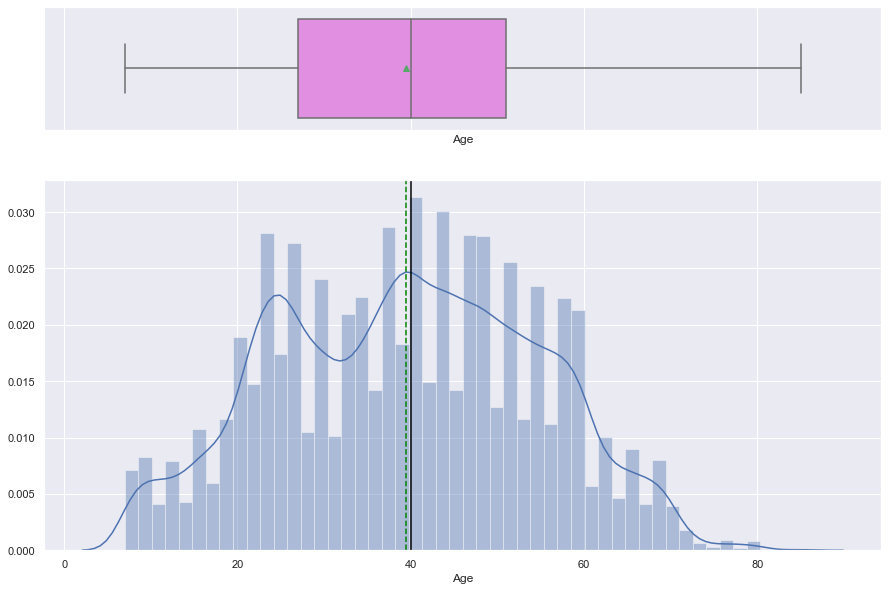

In [25]:
#see distribution for Age

histo_box(df_merged['Age'])



####   OBSERVATIONS:
* Age does not have any outliers.
* All people are between 7 and 85 years of age.
* there is no skewness in this variable

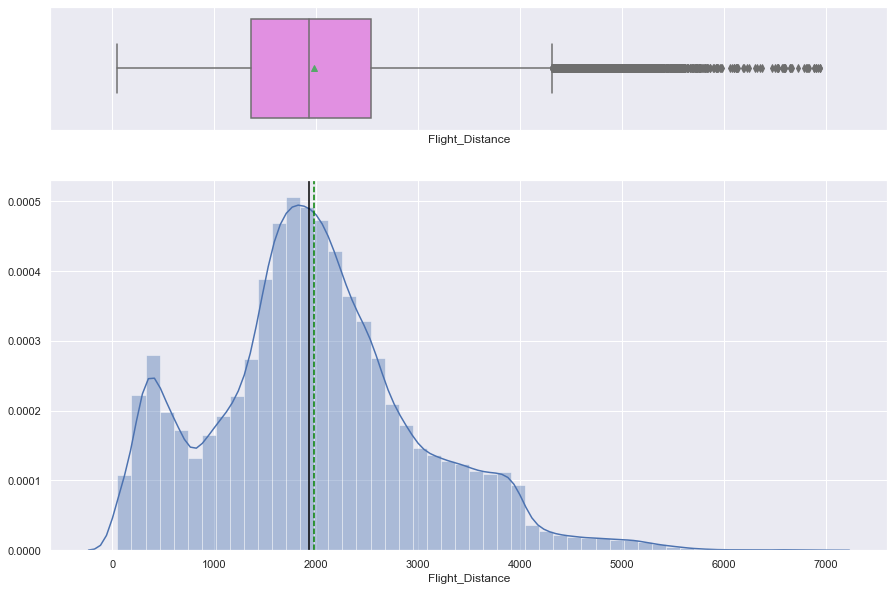

In [26]:
#see distribution for Flight_Distance

histo_box(df_merged['Flight_Distance'])


####   OBSERVATIONS:
* Flight_Distance has many outliers on the upper end.
* there is very very slight right skewness in this variable
* we can see from he boxplot that more than 4300 miles of flight distance are outliers.

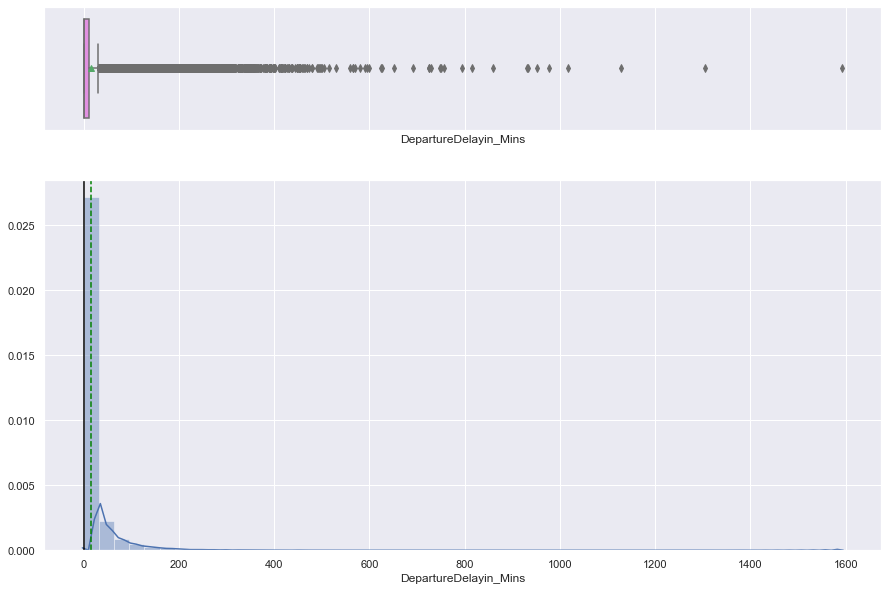

In [27]:
#see distribution for DepartureDelayin_Mins

histo_box(df_merged['DepartureDelayin_Mins'])


####   OBSERVATIONS:
* DepartureDelayin_Mins is a little skewed on the right 
* mean DepartureDelayin_Mins is 14.7 mins. 
* At least 50% of flights are on time. 
* Only 25% of flights have a delay of more than 12 mins. 
* Max delay is 26.53 hours, which means that those flights were cancelled for the day and rescheduled.  

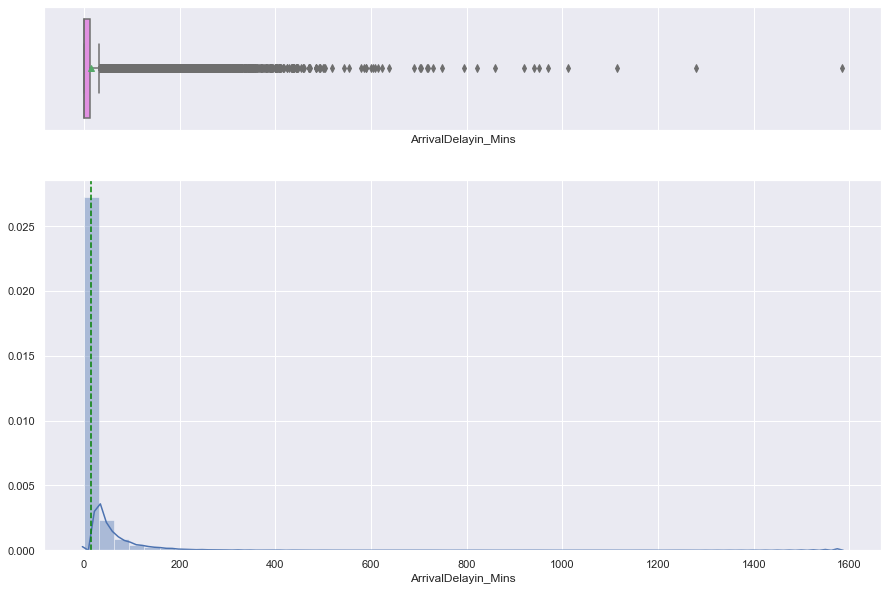

In [28]:
#see distribution for ArrivalDelayin_Mins

histo_box(df_merged['ArrivalDelayin_Mins'])

####   OBSERVATIONS:
* ArrivalDelayin_Mins is a little skewed on the right 
* mean ArrivalDelayin_Mins is 15 mins. 
* Max delay is 26.53 hours, which means that those flights were cancelled for the day and rescheduled.  

## EDA Categorical Data

### Univariate Analysis - Categorical

In [29]:
#function to plot the percentages on the barplots.


def percentage_barplot(ax, feature):
    
   
    total = len(feature)  #length of column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # calculate percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 12)
    plt.show() #show the plot

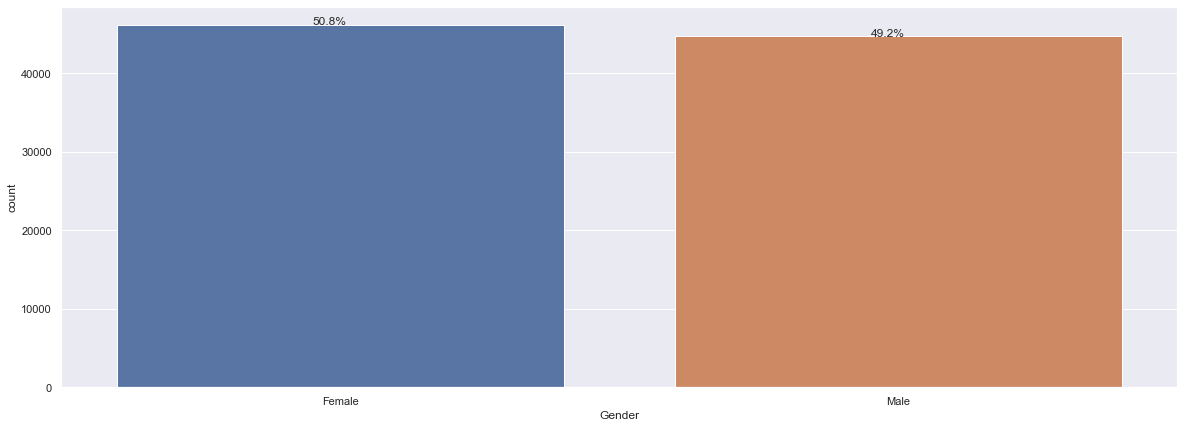

In [30]:

#Gender

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Gender'])
percentage_barplot(ax,df_merged['Gender'])





###   OBSERVATIONS:
* A little over 50% of the travellers are women.


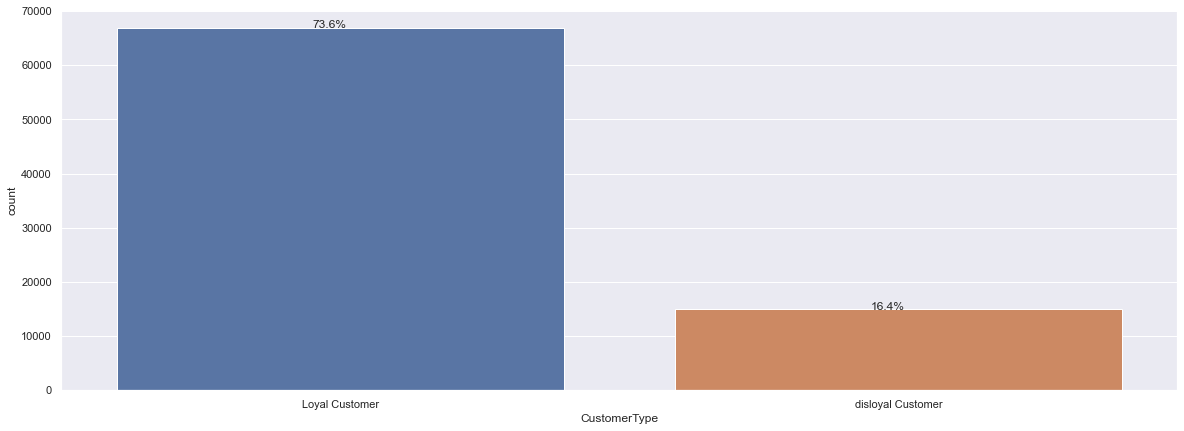

In [31]:

#CustomerType

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['CustomerType'])
percentage_barplot(ax,df_merged['CustomerType'])

###   OBSERVATIONS:
* 73.6% of customers are loyal to the Falcon Airlines.

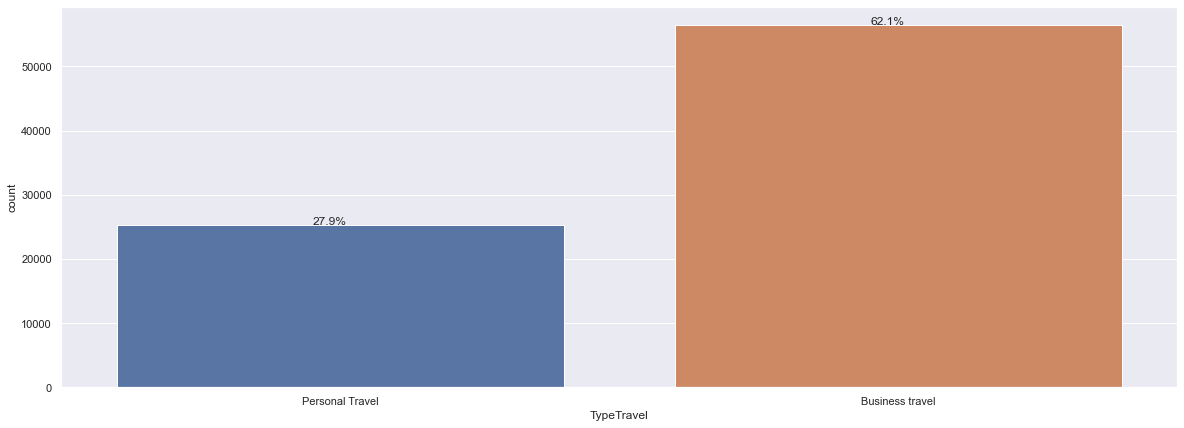

In [32]:
#TypeTravel

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['TypeTravel'])
percentage_barplot(ax,df_merged['TypeTravel'])

#   OBSERVATIONS:
* 62.7% of customers are travelling for Business.

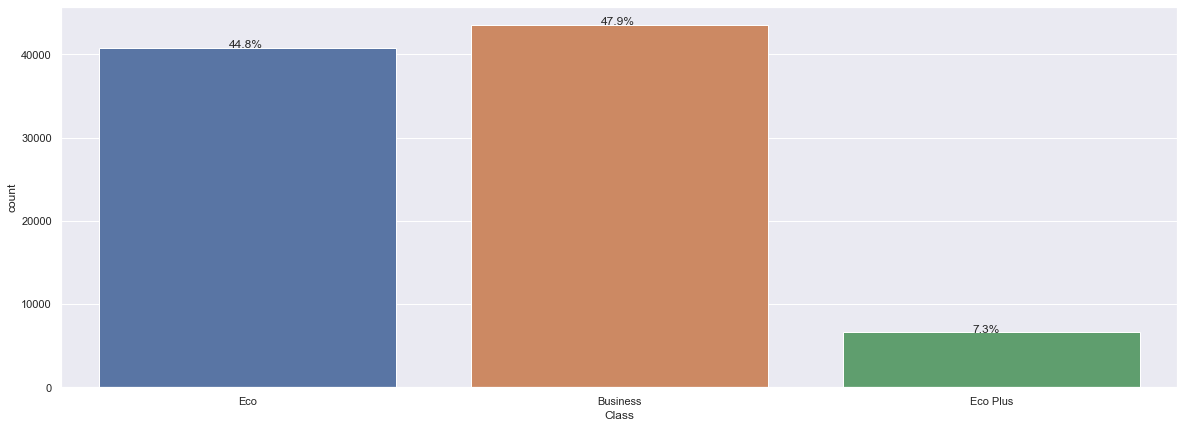

In [33]:
#Class

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Class'])
percentage_barplot(ax,df_merged['Class'])

###   OBSERVATIONS:
* 47.9% customers travel business class 
* Only 7.3% travel economy plus.

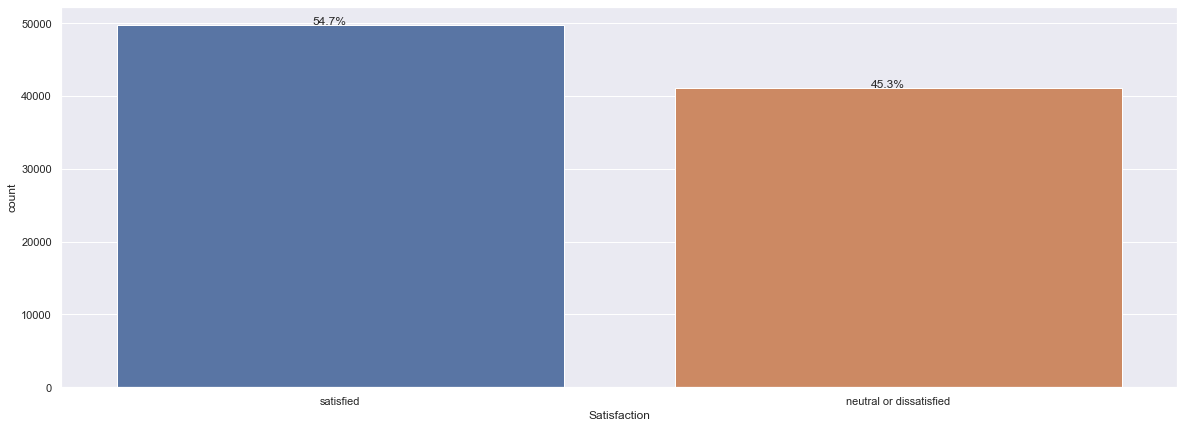

In [34]:
#Satisfaction

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Satisfaction'])
percentage_barplot(ax,df_merged['Satisfaction'])

###   OBSERVATIONS:
* 54.7% of customers are satisfied with Falcon Airlines.

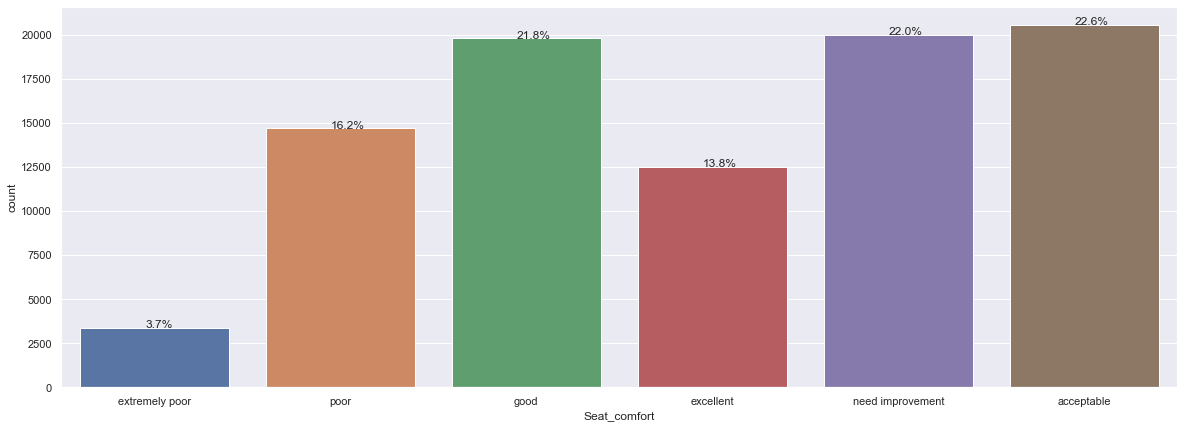

In [35]:
#Seat_comfort

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Seat_comfort'])
percentage_barplot(ax,df_merged['Seat_comfort'])

###   OBSERVATIONS:
* 19.9% of customers think the Seat_comfort is either poor or extremely poor
* 22% of customers think that the Seat_comfort needs improvement.
* 22.6% of customers think that the Seat_comfort is acceptable 
* 35.6% of customers think that the Seat_comfort is either good or excellent
* Insights:
* 58.2% - acceptable, good, or excellent
* 41.9% - needs improvement, poor or extremely poor
* quite a large percentage wants seats that are more comfortable

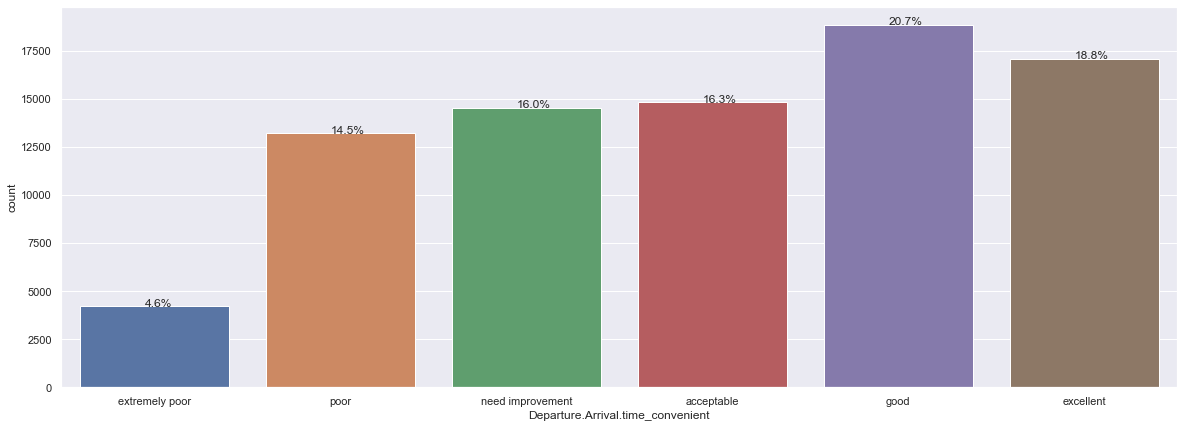

In [36]:
#Departure.Arrival.time_convenient

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Departure.Arrival.time_convenient'])
percentage_barplot(ax,df_merged['Departure.Arrival.time_convenient'])

###  OBSERVATIONS:
* 19.1% of customers think the Food_drink is either poor or extremely poor
* 16% of customers think that the Food_drink needs improvement.
* 16.3% of customers think that the Food_drink is acceptable 
* 39.5% of customers think that the Food_drink is either good or excellent
* Insights:
* 55.8% - acceptable, good, or excellent
* 35.1% - needs improvement, poor or extremely poor

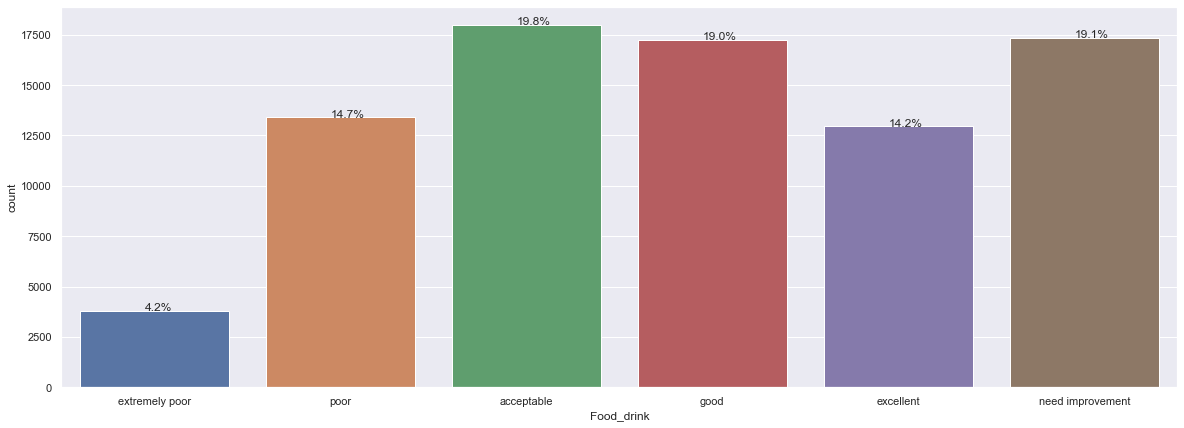

In [37]:
#Food_drink

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Food_drink'])
percentage_barplot(ax,df_merged['Food_drink'])

###   OBSERVATIONS:
* 18.9% of customers think the Food_drink is either poor or extremely poor
* 19.1% of customers think that the Food_drink needs improvement.
* 19.8% of customers think that the Food_drink is acceptable 
* 33.2% of customers think that the Food_drink is either good or excellent
* Insights:
* 53% - acceptable, good, or excellent
* 38% - needs improvement, poor or extremely poor

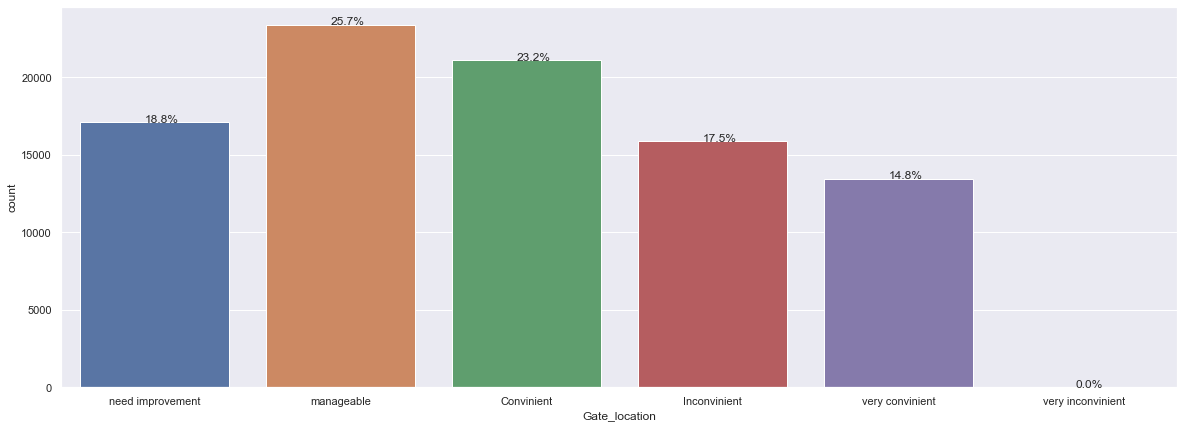

In [38]:
#Gate_location

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Gate_location'])
percentage_barplot(ax,df_merged['Gate_location'])

###  OBSERVATIONS:
* 17.5% of customers think the Gate_location is Inconvenient or very inconvenient
* 18.8% of customers think that the Gate_location needs improvement.
* 25.7% of customers think that the Gate_location is manageable 
* 38% of customers think that the Gate_location is either convenient or very convenient
* Insights:
* 63.7% - manageable, convenient or very convenient
* 36.3% - needs improvement, inconvenient or very inconvenient

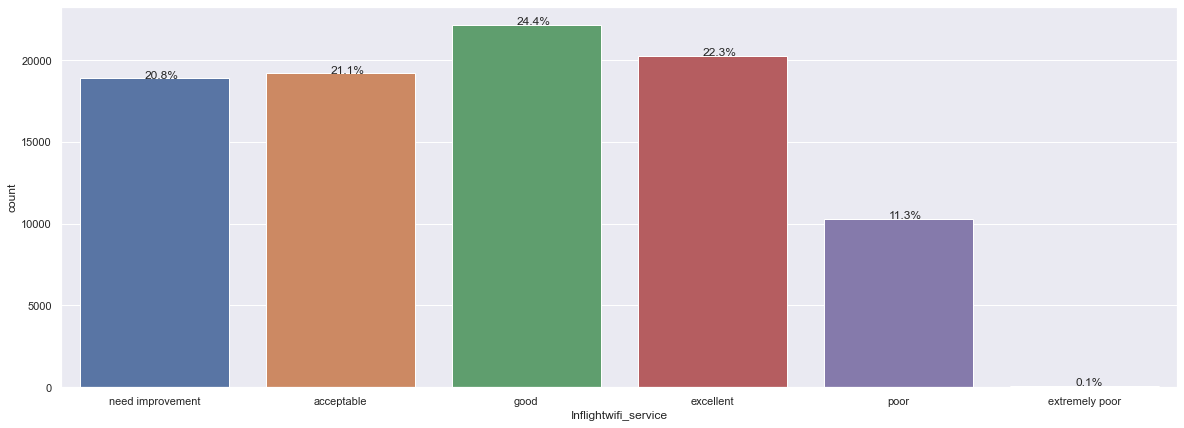

In [39]:
#Inflightwifi_service

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Inflightwifi_service'])
percentage_barplot(ax,df_merged['Inflightwifi_service'])

##  OBSERVATIONS:
* 11.4% of customers think the Inflightwifi_service is either poor or extremely poor
* 20.8% of customers think that the Inflightwifi_service needs improvement.
* 21.1% of customers think that the Inflightwifi_service is acceptable 
* 46.7 % of customers think that the Inflightwifi_service is either good or excellent
* Insights:
* 67.8% - acceptable, good, or excellent
* 32.2% - needs improvement, poor or extremely poor

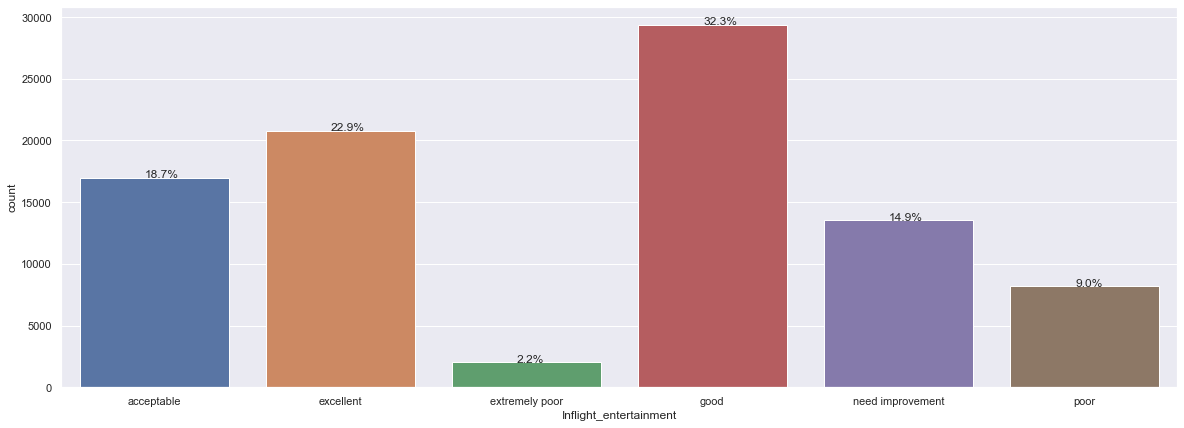

In [139]:
#Inflight_entertainment

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Inflight_entertainment'])
percentage_barplot(ax,df_merged['Inflight_entertainment'])

##  OBSERVATIONS:
* 11.2% of customers think the Inflight_entertainment is either poor or extremely poor
* 14.9% of customers think that the Inflight_entertainment needs improvement.
* 18.7% of customers think that the Inflight_entertainment is acceptable.
* 55.2% of customers think that the Inflight_entertainment is either good or excellent
* Insights:
* 73.9% - acceptable, good, or excellent
* 26.1% - needs improvement, poor or extremely poor


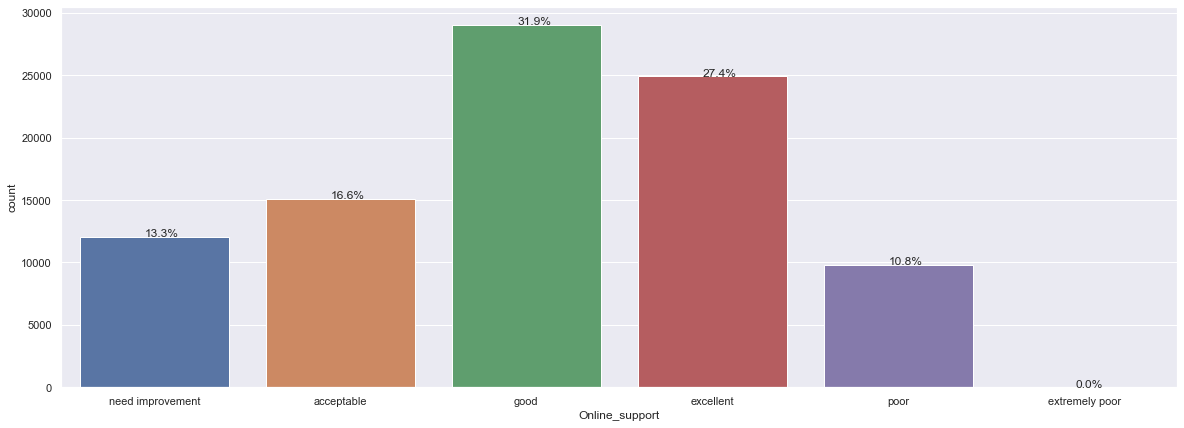

In [41]:
#Online_support

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Online_support'])
percentage_barplot(ax,df_merged['Online_support'])

###  OBSERVATIONS:
* 10.8% of customers think the Online_support is either poor or extremely poor
* 13.3% of customers think that the Online_support needs improvement.
* 16.6% of customers think that the Online_support is acceptable.
* 59.3% of customers think that the Online_support is either good or excellent
* Insights:
* 75.9% - acceptable, good, or excellent
* 24.1% - needs improvement, poor or extremely poor

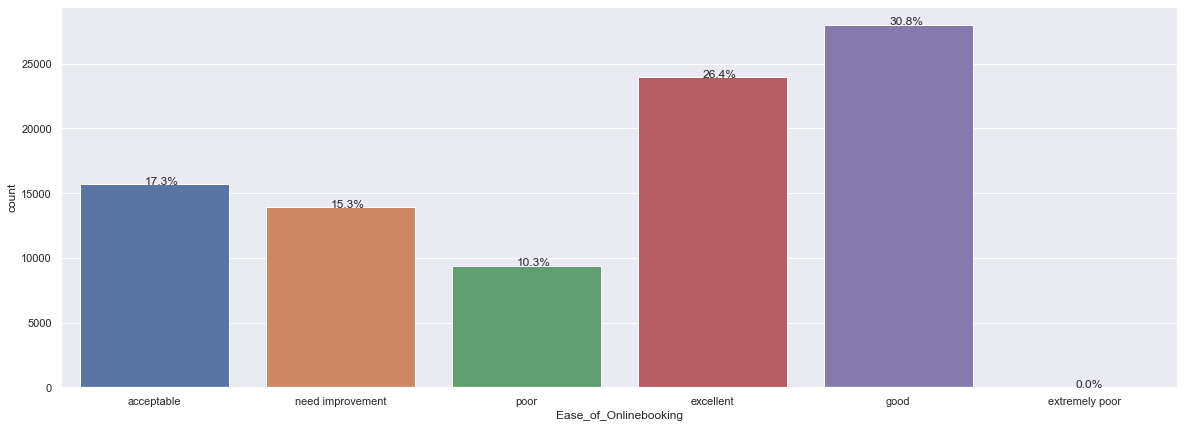

In [42]:
#Ease_of_Onlinebooking

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Ease_of_Onlinebooking'])
percentage_barplot(ax,df_merged['Ease_of_Onlinebooking'])

###  OBSERVATIONS:
* 10.3% of customers think the Ease_of_Onlinebooking is either poor or extremely poor
* 15.3% of customers think that the Ease_of_Onlinebooking needs improvement.
* 17.3% of customers think that the Ease_of_Onlinebooking is acceptable.
* 57.2% of customers think that the Ease_of_Onlinebooking is either good or excellent
* Insights:
* 74.5% - acceptable, good, or excellent
* 25.6% - needs improvement, poor or extremely poor

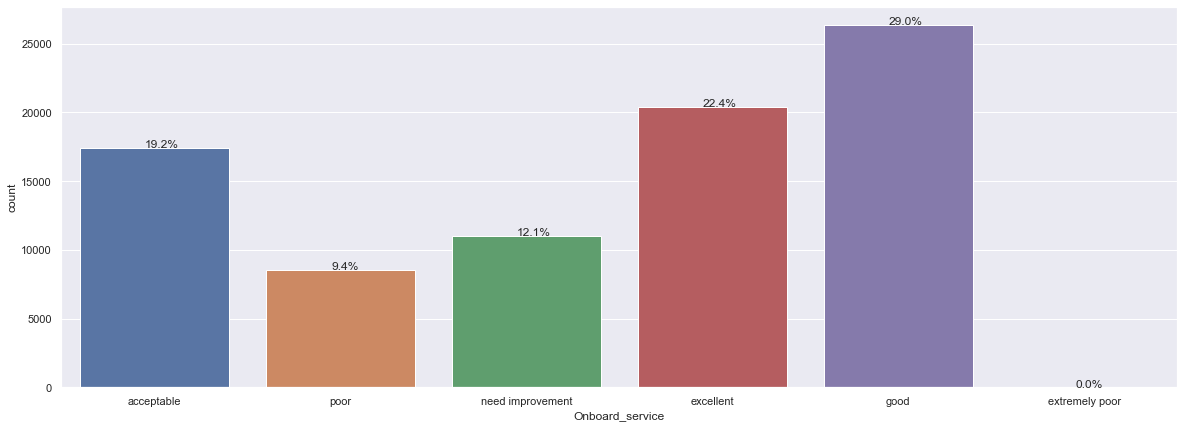

In [43]:
#Onboard_service

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Onboard_service'])
percentage_barplot(ax,df_merged['Onboard_service'])

###  OBSERVATIONS:
* 9.4% of customers think the Onboard_service is either poor or extremely poor
* 12.1% of customers think that the Onboard_service needs improvement.
* 19.2% of customers think that the Onboard_service is acceptable.
* 51.4% of customers think that the Onboard_service is either good or excellent
* Insights:
* 70.6% - acceptable, good, or excellent
* 21.5% - needs improvement, poor or extremely poor

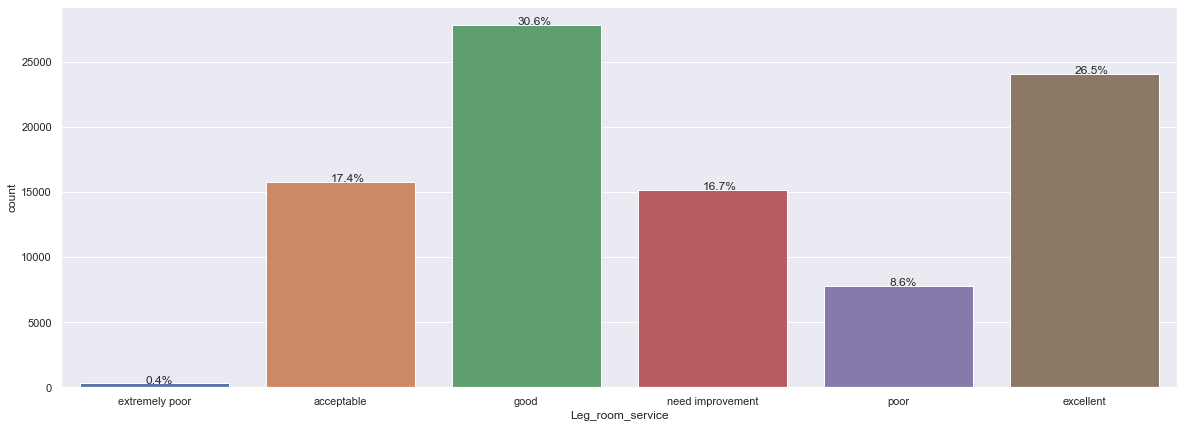

In [44]:
#Leg_room_service

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Leg_room_service'])
percentage_barplot(ax,df_merged['Leg_room_service'])

###  OBSERVATIONS:
* 9% of customers think the Leg_room_service is either poor or extremely poor
* 16.7% of customers think that the Leg_room_service needs improvement.
* 17.4% of customers think that the Leg_room_service is acceptable.
* 57.1% of customers think that the Leg_room_service is either good or excellent
* Insights:
* 74.5% - acceptable, good, or excellent
* 25.7% - needs improvement, poor or extremely poor

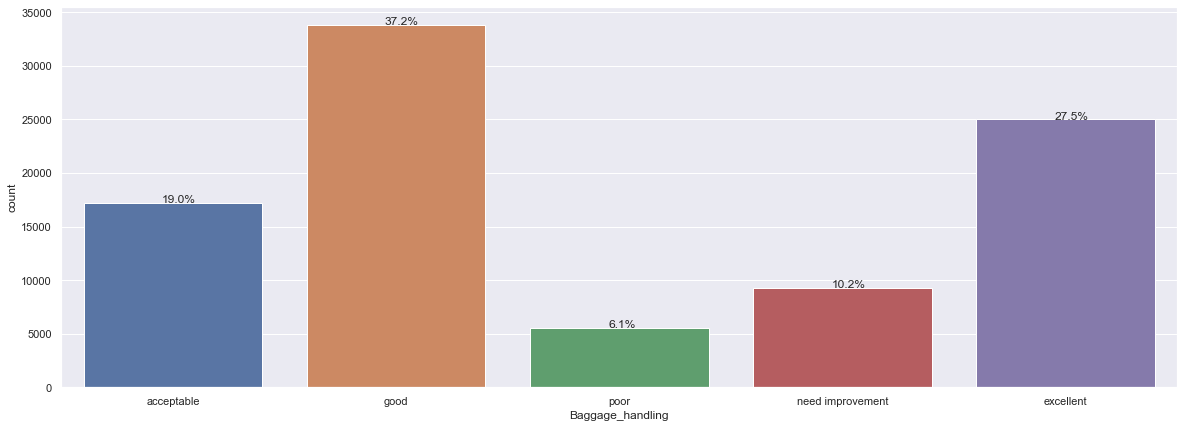

In [45]:
#Baggage_handling

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Baggage_handling'])
percentage_barplot(ax,df_merged['Baggage_handling'])

###  OBSERVATIONS:
* 6.1% of customers think the Baggage_handling is poor
* 10.2% of customers think that the Baggage_handling needs improvement.
* 19% of customers think that the Baggage_handling is acceptable.
* 64.7% of customers think that the Baggage_handling is either good or excellent
* Insights:
* 83.7% - acceptable, good, or excellent
* 16.3% - needs improvement, poor or extremely poor

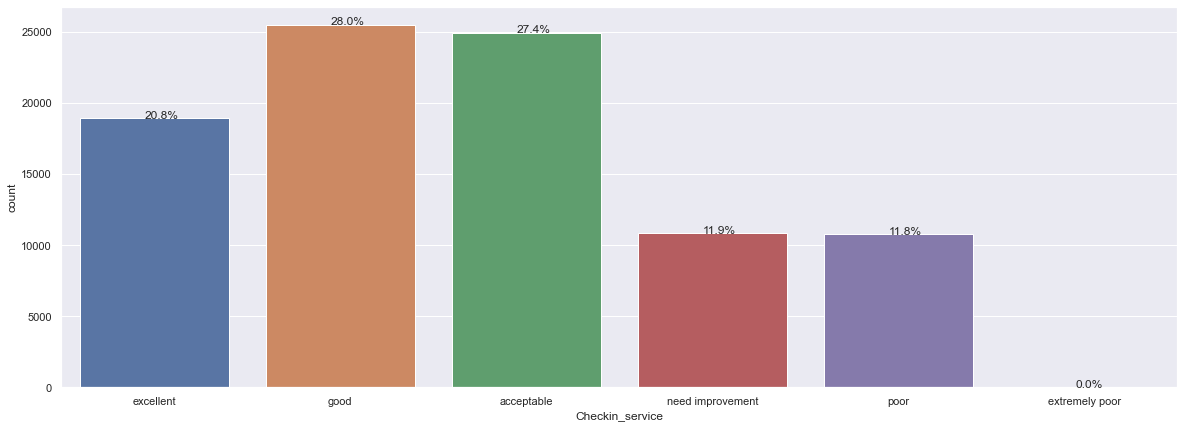

In [46]:
#Checkin_service

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Checkin_service'])
percentage_barplot(ax,df_merged['Checkin_service'])

###  OBSERVATIONS:
* 11.8% of customers think the Checkin_service is either poor or extremely poor
* 11.9% of customers think that the Checkin_service needs improvement.
* 27.4% of customers think that the Checkin_service is acceptable.
* 48.8% of customers think that the Checkin_service is either good or excellent
* Insights:
* 75.8% - acceptable, good, or excellent
* 23.7% - needs improvement, poor or extremely poor

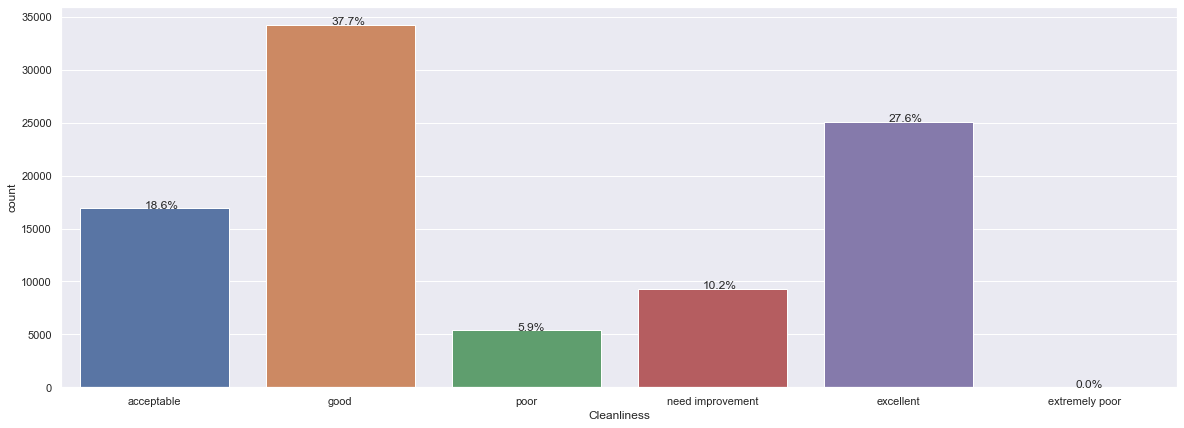

In [47]:
#Cleanliness

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Cleanliness'])
percentage_barplot(ax,df_merged['Cleanliness'])

###  OBSERVATIONS:
* 5.9% of customers think the Cleanliness is either poor or extremely poor
* 10.2% of customers think that the Cleanliness needs improvement.
* 18.6% of customers think that the Cleanliness is acceptable.
* 65.3% of customers think that the Cleanliness is either good or excellent
* Insights:
* 83.9% - acceptable, good, or excellent
* 16.1% - needs improvement, poor or extremely poor

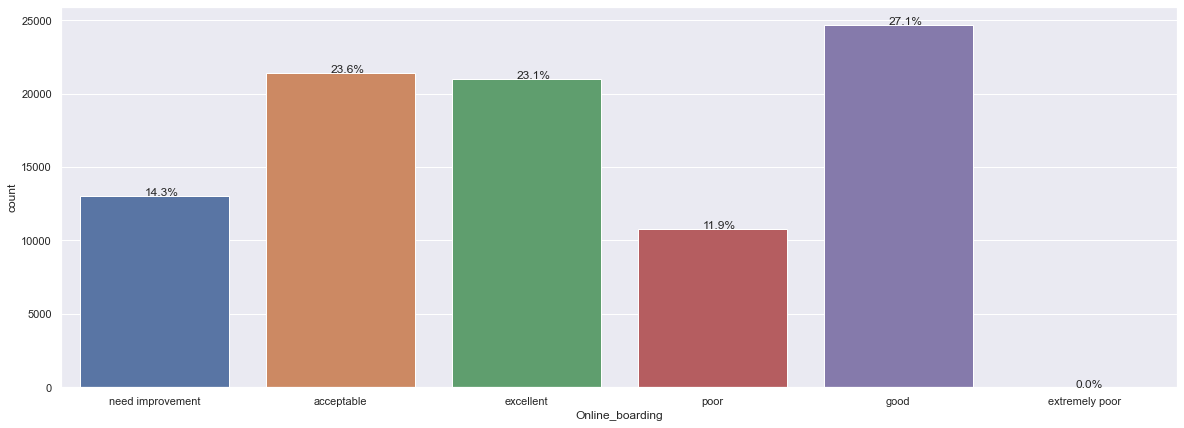

In [48]:
#Online_boarding

plt.figure(figsize = (20,7))
ax = sns.countplot(df_merged['Online_boarding'])
percentage_barplot(ax,df_merged['Online_boarding'])

###  OBSERVATIONS:
* 11.9% of customers think the Online_boarding is either poor or extremely poor
* 14.3% of customers think that the Online_boarding needs improvement.
* 23.6% of customers think that the Online_boarding is acceptable.
* 50.2% of customers think that the Online_boarding is either good or excellent
* Insights:
* 73.8% - acceptable, good, or excellent
* 26.2% - needs improvement, poor or extremely poor

## EDA BiVariate analysis

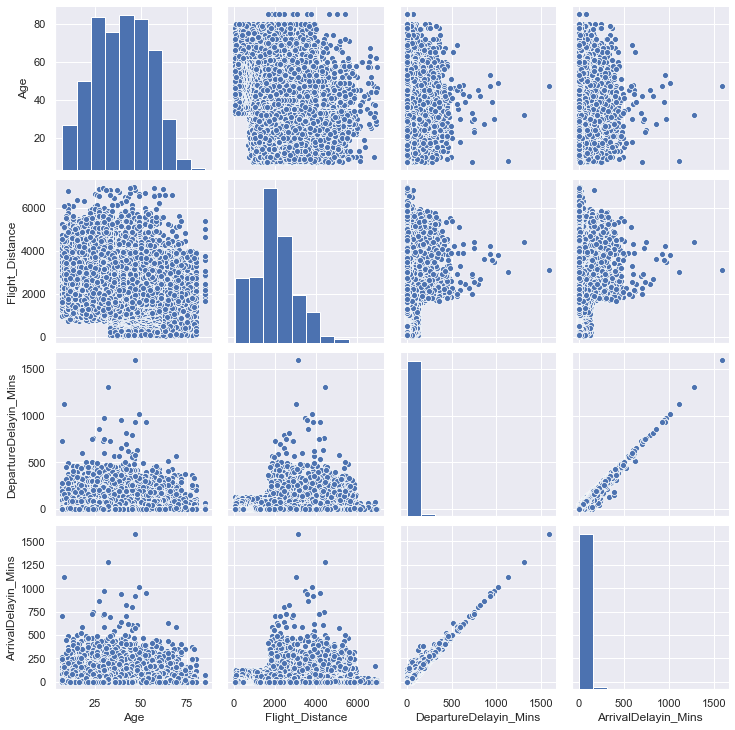

In [49]:
sns.pairplot(data=df_merged)
plt.show()

### CORREALTION MATRIX OF NUMERICAL VARIABLES

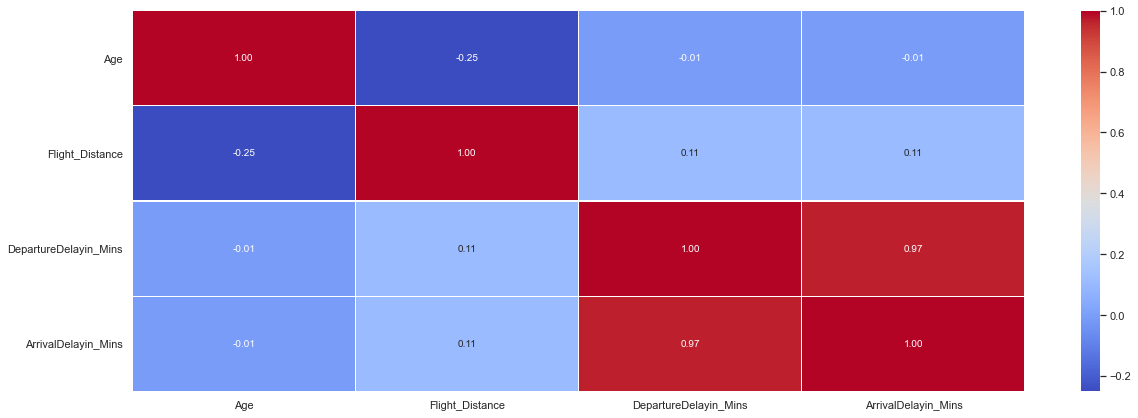

In [50]:
plt.figure(figsize = (20,7))
sns.heatmap(df_merged.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


####   OBSERVATIONS:
* DepartureDelayin_Mins and ArrivalDelayin_Mins have a correlation of almost 1, which makes sense because the flight that gets delayed is the one that arrives late as well by the same number of minutes.
* Flight_Distance and Age seem to have a little bit of a negative correlation


###  Satisfaction vs Age

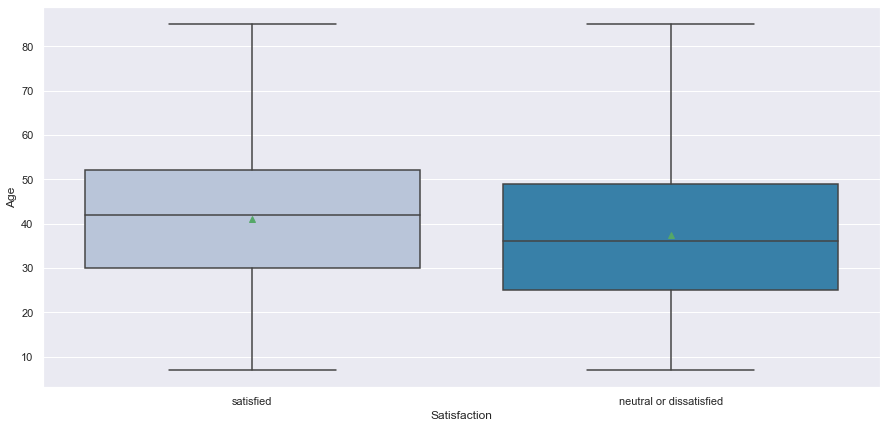

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Satisfaction"],df_merged["Age"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Average age of satisfied customers is higher at about 43 years 
* Average age of dissatisfied customers is about 36 years.

###  Satisfaction vs Age vs Gender

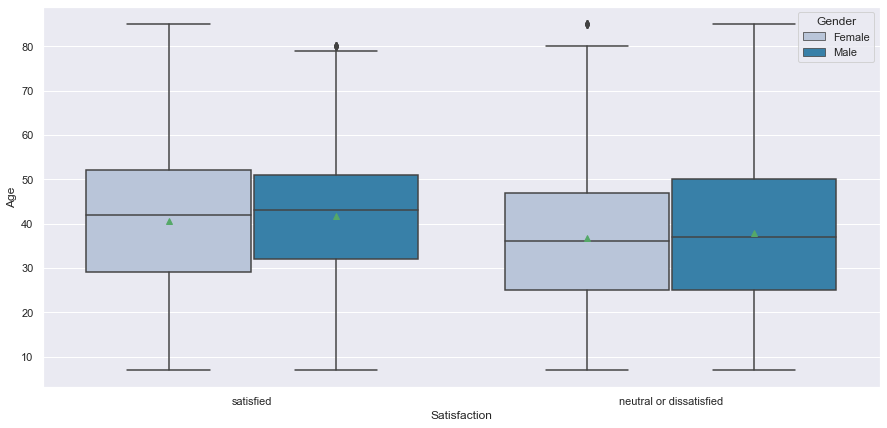

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Satisfaction"],df_merged["Age"],hue = df_merged["Gender"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Younger people are more dissatisfied with the airlines.
* there are more dissatisfied male customers than dissatisfied female customers
* there are more satisfied female customers than satisfied male customers


###  Satisfaction vs Flight_Distance

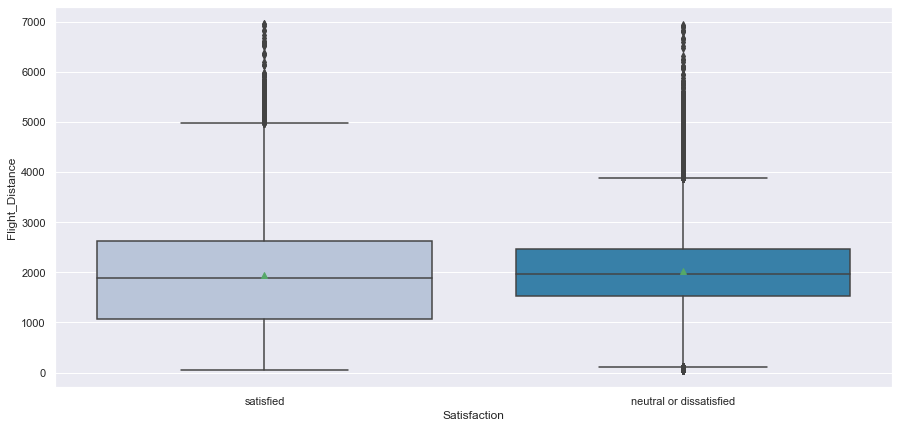

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Satisfaction"],df_merged["Flight_Distance"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* majority of dissatisfied customers usually travel between 1500 and 2500 miles, with outliers on both ends.
* satisfied customers mostly travel between 1100 and 2700 miles, with outliers on the upper end.
* dissatisfied customers usually travel longer distances 


###  Satisfaction vs DepartureDelayin_Mins

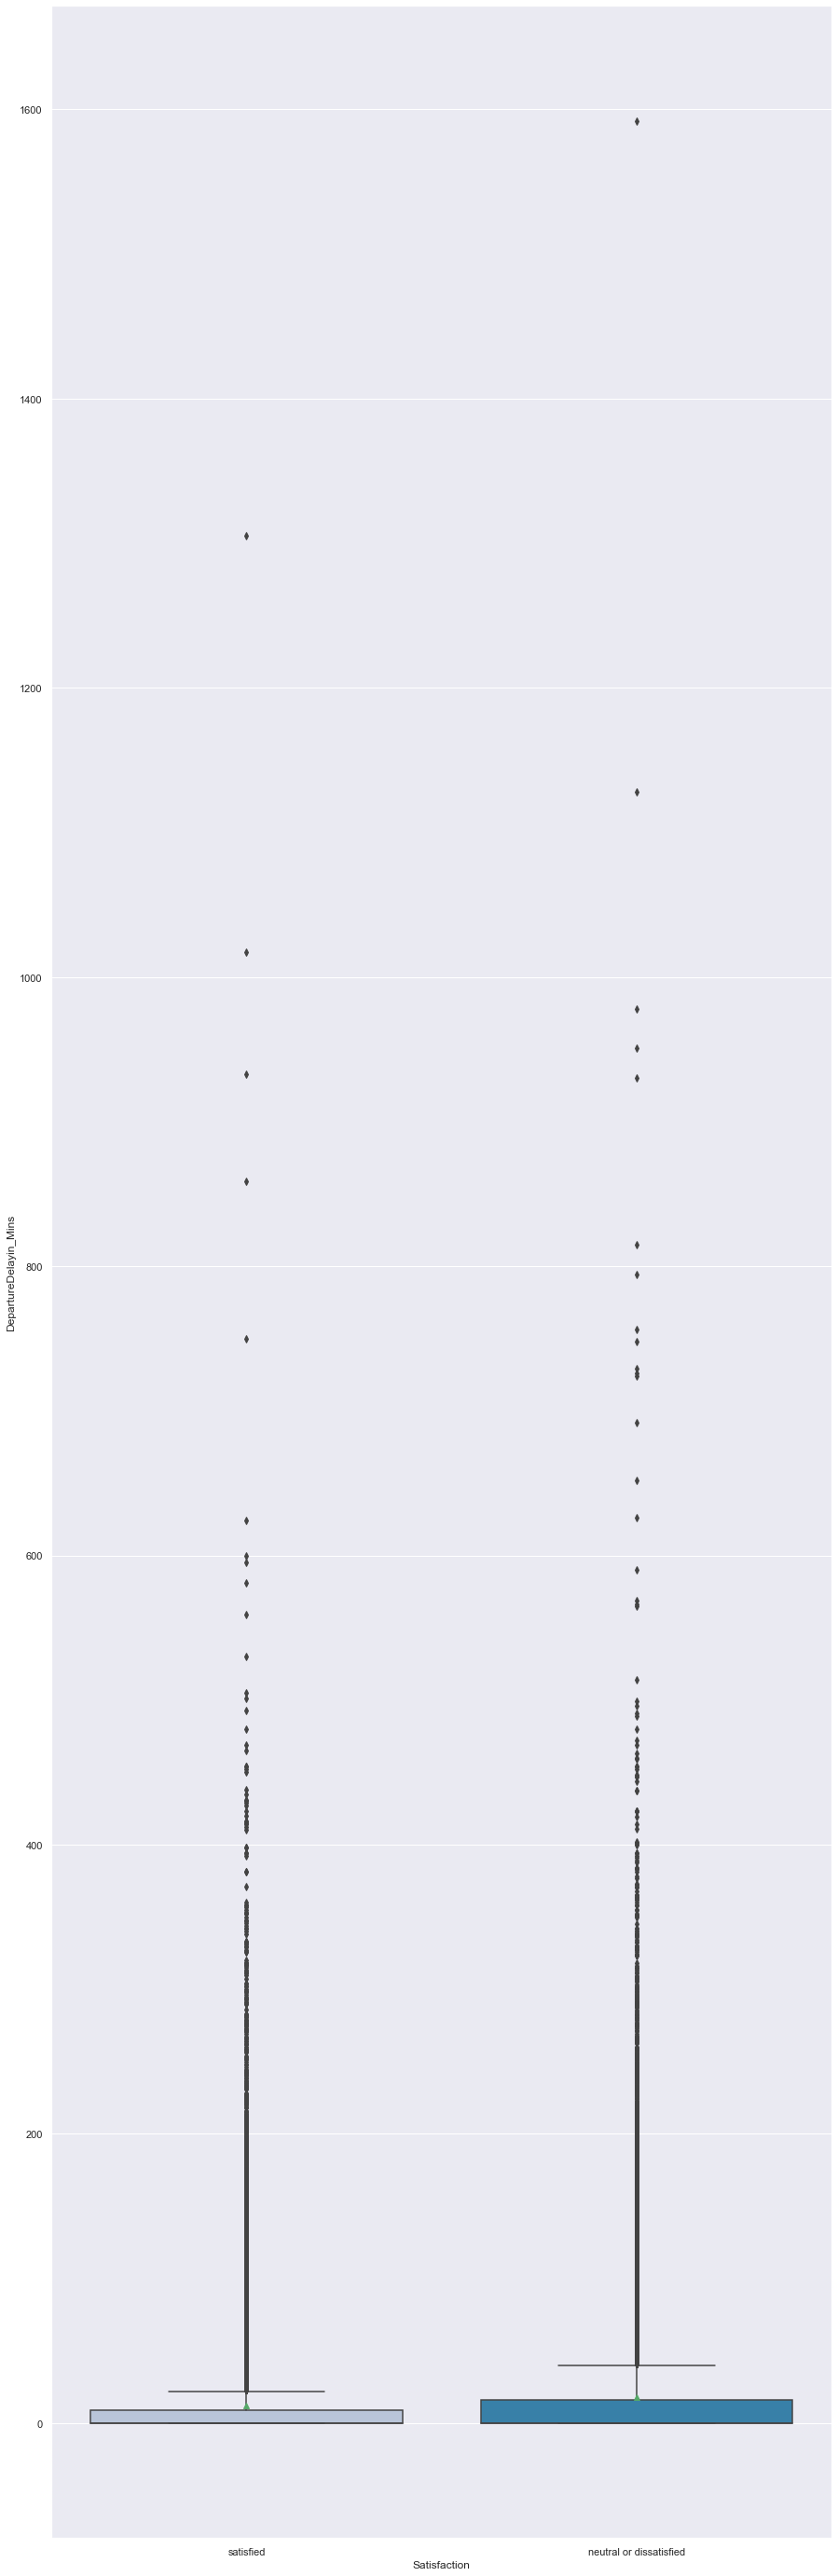

In [54]:
plt.figure(figsize=(15,50))
sns.boxplot(df_merged["Satisfaction"],df_merged["DepartureDelayin_Mins"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* dissatisfied customers generally have experienced almost twice as much departure delay minutes than satisfied customers.
* mean departure delayed minutes for dissatisfied customers is higher than that of satisfied customers.

###  Inflightwifi_service vs Age vs Satisfaction

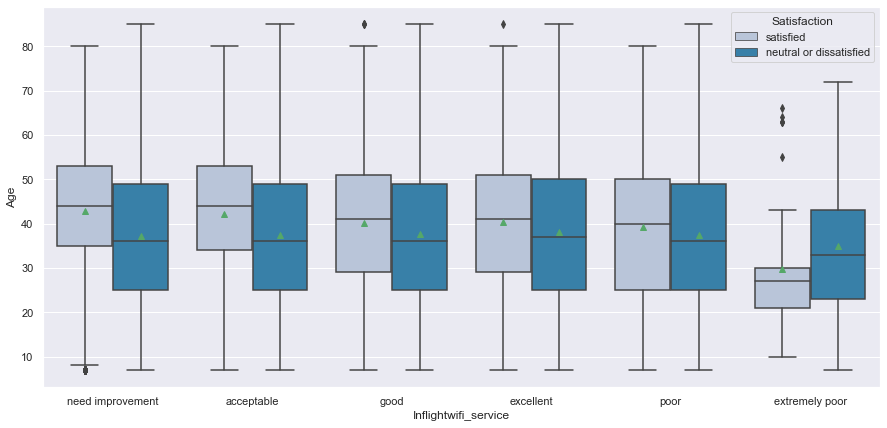

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Inflightwifi_service"],df_merged["Age"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* In satisfied customers, the ones who rated the inflight wifi as extremely poor were between 21 and 30 years of age.
* dissatisfied customers are mostly in the range of 25-49 years of age.
* satisfied customers who rated the inflight wifi service as extremely poor were in their 20s
* acceptable and needs improvement have very similar patterns, could they be combined into 1 category?
* good and excellent have very similar patterns, could they be combined into 1 category?

###  CustomerType vs Age vs Satisfaction

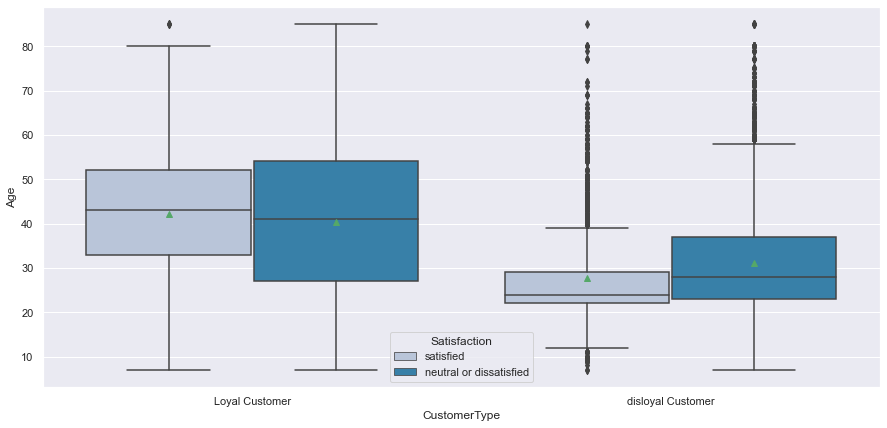

In [56]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["CustomerType"],df_merged["Age"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* mean age of loyal customers is higher than that of disloyal customers.
* there are a lot of outliers in disloyal customers.
* there are more dissatisfied people within the Loyal customers group. 


###  TypeTravel vs Flight_Distance vs Satisfaction

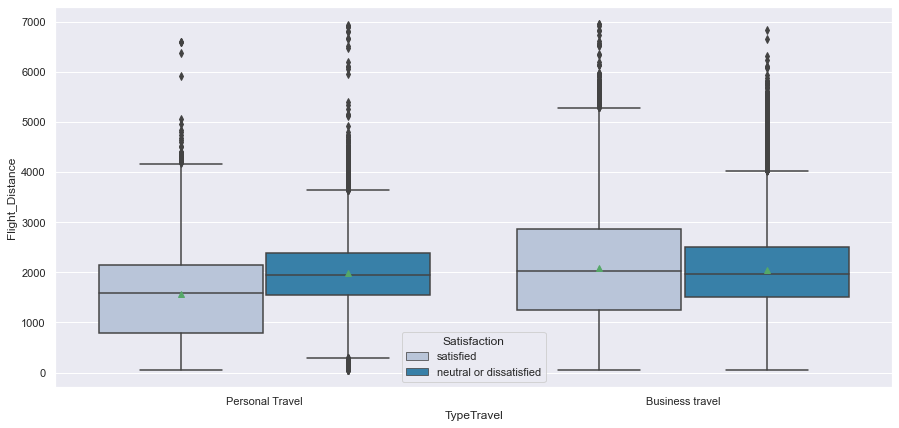

In [57]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["TypeTravel"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* satisfied customers do more business travel than neutral or dissatisfied
* satisfied customers who did personal travel travelled shorter distances 
* dissatisfied customers who did personal travel travelled longer flight distances than other personal travellers

###  Cleanliness vs Flight_Distance vs Satisfaction

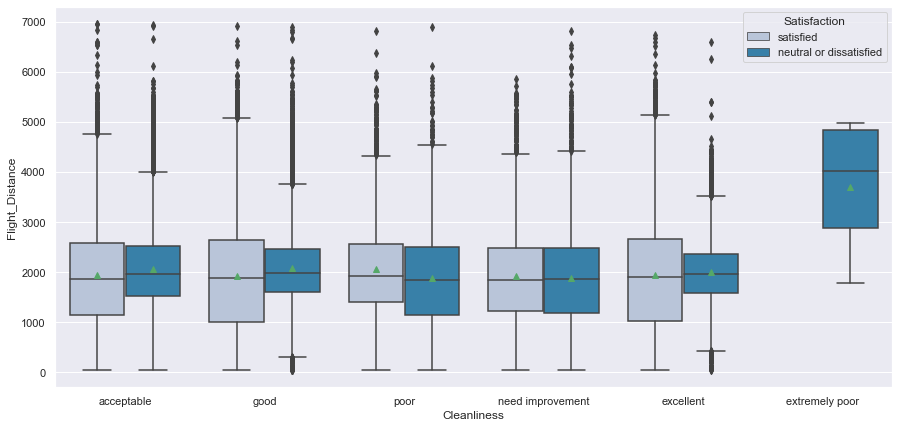

In [58]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Cleanliness"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* customers who travel longer distances care more about cleanliness on the plane.
* Only dissatisfied customers rated the cleanliness as extremely poor
* cusotmers who rated cleanliness as extremely poor had the highest flight distance.
* Insights: 
* is the plane not being kept clean on longer flights? need to enforce periodic cleanings in long flights.
* should need improvement and poor can be merged into one category?
* should good and excellent be merged into one category?

###  Class vs Flight_Distance vs Satisfaction

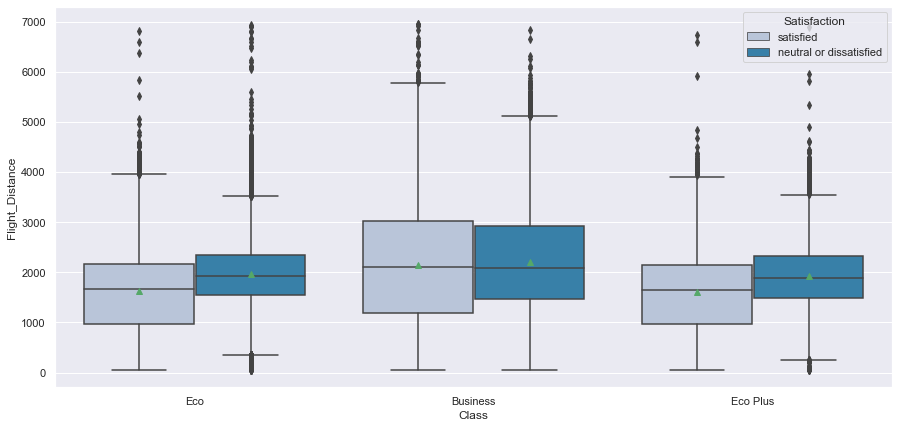

In [59]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Class"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* generally the mean flight distance travelled by satisfied customers is lower than that travelled by dissatisfied customers, especially the eco and eco plus customers
* satisfied customers who travelled Business class travelled longer flight distances.


###  Seat_comfort vs Flight_Distance vs Satisfaction

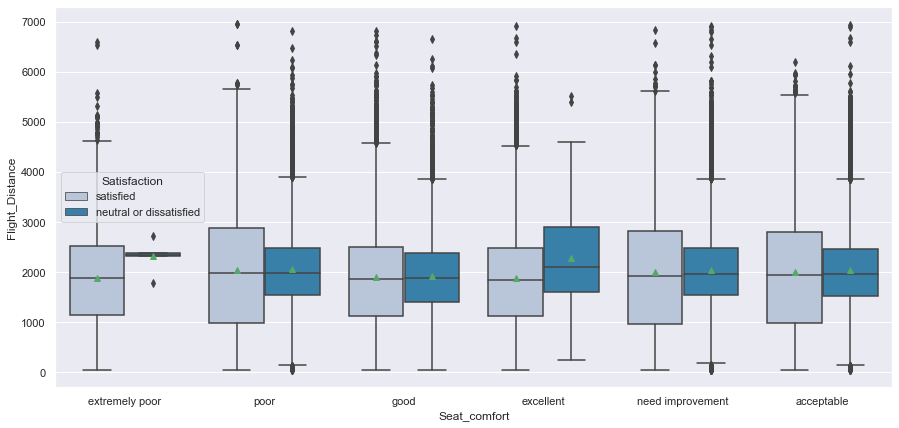

In [60]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Seat_comfort"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* a lot of satisfied customers also feel that the seat comfort is poor.
* very few dissatisfied customers feel that the seat comfort is extremelty poor but there are quite a few satisfied customers with that opinion.

###  Gate_location vs Flight_Distance vs Satisfaction

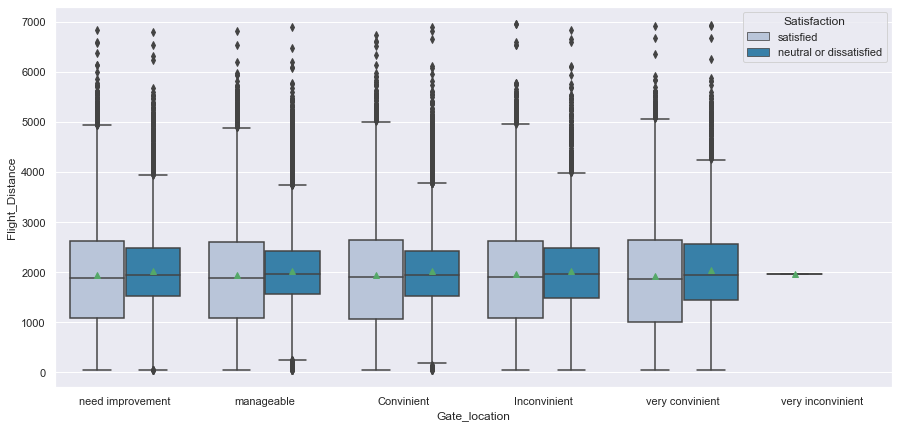

In [61]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Gate_location"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* barely anyone thought that the gate location was very inconvenient. 
* 


###  Inflight_entertainment vs Flight_Distance vs Satisfaction

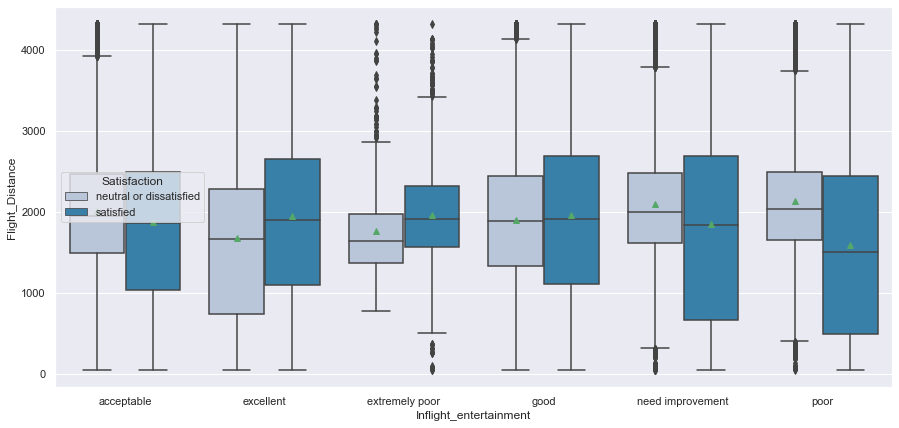

In [141]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Inflight_entertainment"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* a large number of satisfied customers think that the inflight entertainment is poor and needs to be improved.
* quite a few of the satisfied customers who rated inflight entertainment as poor and needs improvement had shorter flight distances
* Insight: do shorter flights not have a good inflight entertainment plan? could look into this. 
* the dissatisfied customers who rated the inflight entertainment as poor and needs improvement mostly had higher flight distances than the satisfied customers who made these same rating choices
 




###  Online_support vs Flight_Distance vs Satisfaction

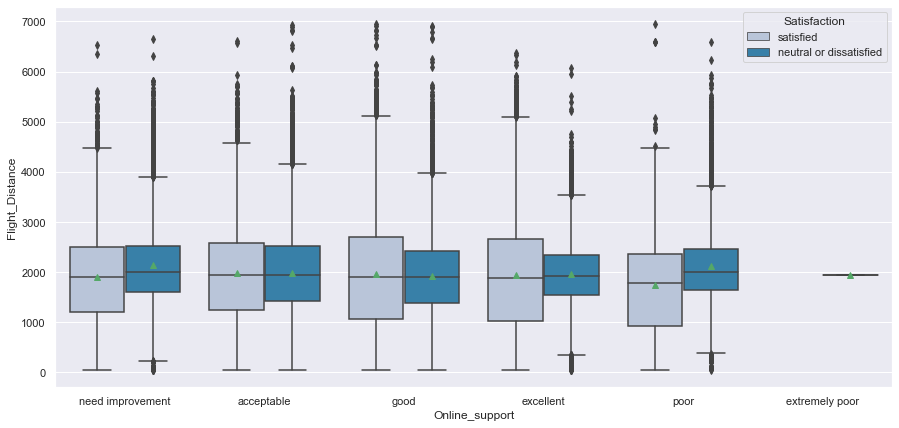

In [63]:
plt.figure(figsize=(15,7))
sns.boxplot(df_merged["Online_support"],df_merged["Flight_Distance"],hue = df_merged["Satisfaction"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
*



### Age vs Flight_Distance vs Satisfaction

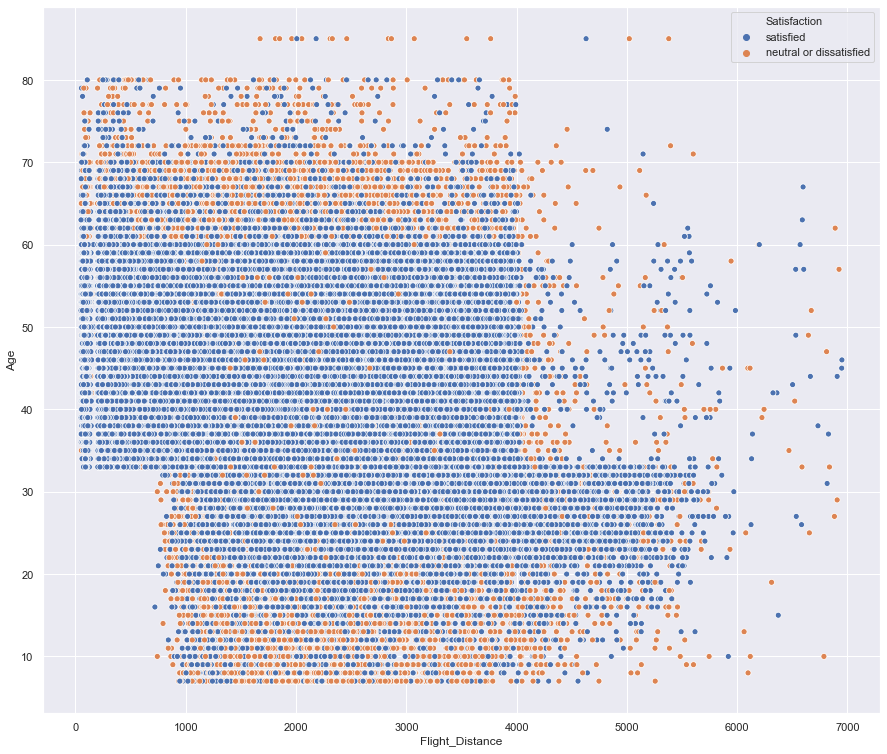

In [64]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Age', x='Flight_Distance', hue='Satisfaction', data=df_merged);

####   OBSERVATIONS:
* majority of the dissatisfied customers are either older than 60 or younger than 20
* flight distance does not seem to affect customer satisfaction

### Age vs DepartureDelayin_Mins vs Satisfaction

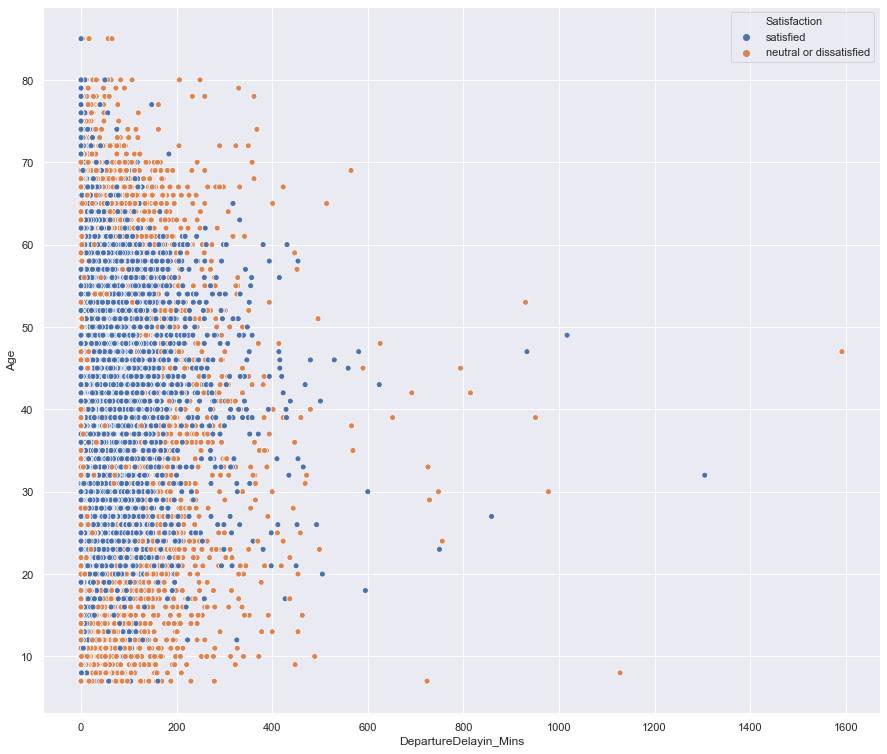

In [65]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Age', x='DepartureDelayin_Mins', hue='Satisfaction', data=df_merged);

####   OBSERVATIONS:
* DepartureDelayin_Mins is mostly under 250 mins 

### Age vs ArrivalDelayin_Mins vs Satisfaction

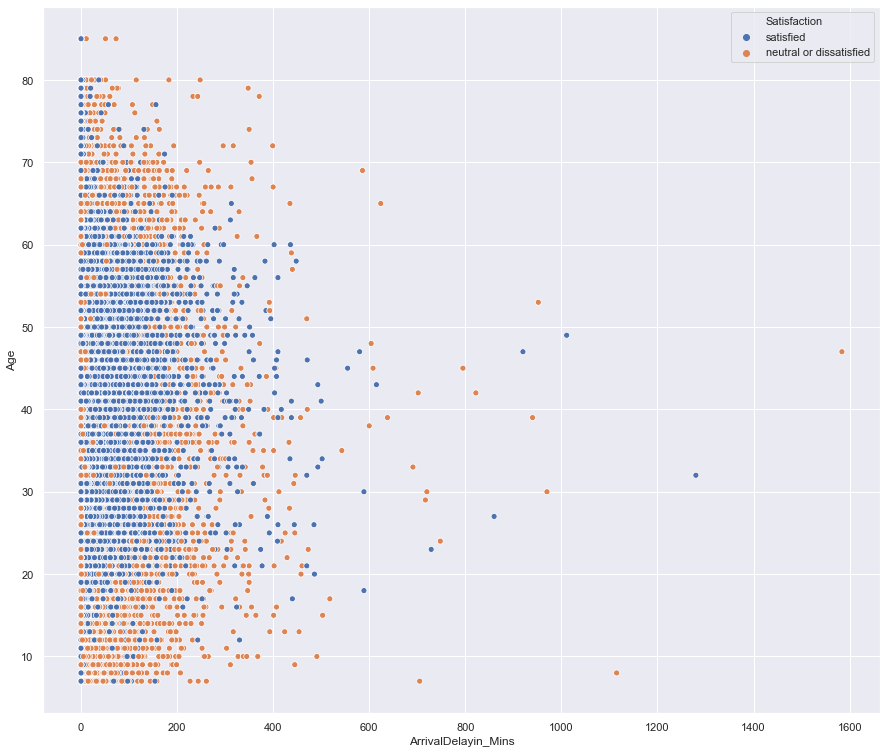

In [66]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Age', x='ArrivalDelayin_Mins', hue='Satisfaction', data=df_merged);

####   OBSERVATIONS:
* ArrivalDelayin_Mins is mostly under 250 mins 

### Flight_Distance vs ArrivalDelayin_Mins vs Satisfaction

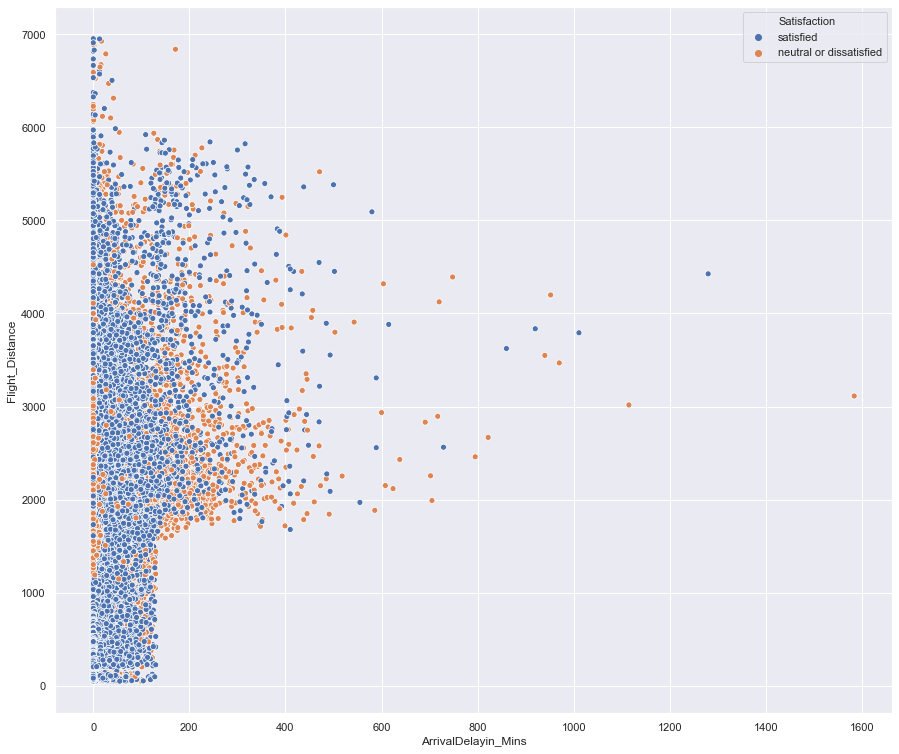

In [67]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Flight_Distance', x='ArrivalDelayin_Mins', hue='Satisfaction', data=df_merged);

####   OBSERVATIONS:
* dissatisfaction in customers increases as ArrivalDelayin_Mins goes up.

### Outlier Treatment

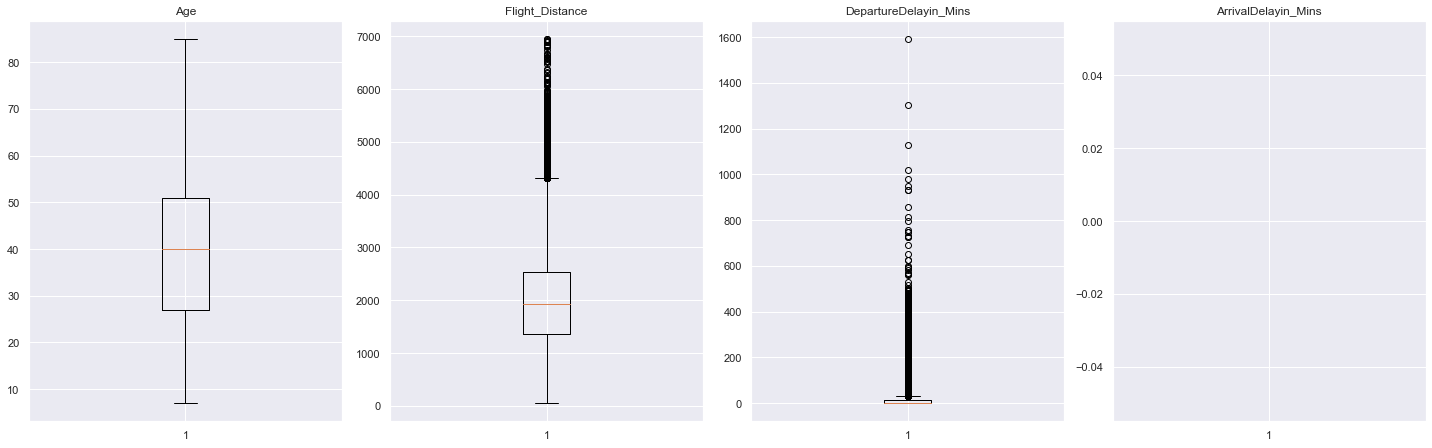

In [68]:
#See outliers 

numeric_columns = df_merged.select_dtypes(include=np.number).columns.tolist() #all numeric columns

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df_merged[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [69]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):

    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    lower_whisker = Q1 - 1.5*IQR 
    upper_whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker) # all the values samller than Lower_Whisker will be given value of Lower_whisker 
                                                            # and all the values above upper_whishker will be given value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
   
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [70]:
numerical_col = df_merged.select_dtypes(include=np.number).columns.tolist()
df_merged = treat_outliers_all(df_merged,numerical_col)

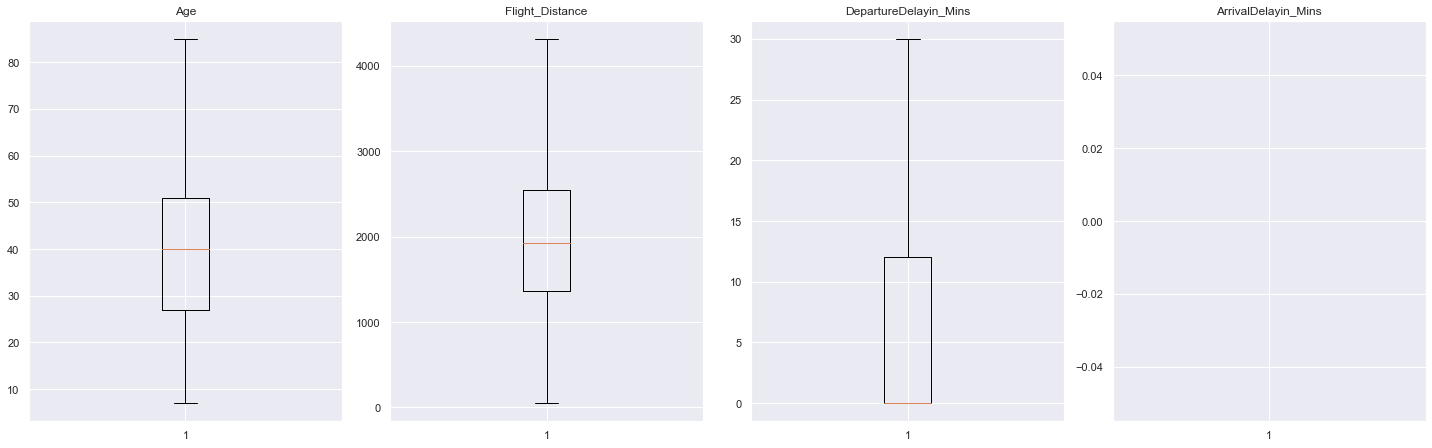

In [71]:
# see all boxplots to see if outliers are still present
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df_merged[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#### Outliers have been removed

### Drop ArrivalDelayin_Mins as it has 0.97 correlation with DepartureDelayin_Mins, and it has a lot of missing values.

In [72]:
df_merged = df_merged.drop(['ArrivalDelayin_Mins'], axis = 1)


### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [73]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90917 entries, 0 to 90916
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             90917 non-null  object
 1   CustomerType                       81818 non-null  object
 2   Age                                90917 non-null  int64 
 3   TypeTravel                         81829 non-null  object
 4   Class                              90917 non-null  object
 5   Flight_Distance                    90917 non-null  int64 
 6   DepartureDelayin_Mins              90917 non-null  int64 
 7   Satisfaction                       90917 non-null  object
 8   Seat_comfort                       90917 non-null  object
 9   Departure.Arrival.time_convenient  82673 non-null  object
 10  Food_drink                         82736 non-null  object
 11  Gate_location                      90917 non-null  object
 12  Infl

### Change object datatype to categorical

In [74]:
df_merged[df_merged.select_dtypes(['object']).columns] = df_merged.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [75]:
# check that the object datatypes were changed to categorical dtype
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90917 entries, 0 to 90916
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             90917 non-null  category
 1   CustomerType                       81818 non-null  category
 2   Age                                90917 non-null  int64   
 3   TypeTravel                         81829 non-null  category
 4   Class                              90917 non-null  category
 5   Flight_Distance                    90917 non-null  int64   
 6   DepartureDelayin_Mins              90917 non-null  int64   
 7   Satisfaction                       90917 non-null  category
 8   Seat_comfort                       90917 non-null  category
 9   Departure.Arrival.time_convenient  82673 non-null  category
 10  Food_drink                         82736 non-null  category
 11  Gate_location                      90917 

In [76]:
df_merged.isnull().sum()

Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
dtype: int64

In [77]:
imputer = KNNImputer(n_neighbors=5)

In [78]:
df_merged.rename(columns = {'Departure.Arrival.time_convenient': 'Departure_Arrival_time_convenient'}, inplace = True)
data1.rename(columns = {'Departure.Arrival.time_convenient': 'Departure_Arrival_time_convenient'}, inplace = True) 

In [79]:
reqd_col_for_impute = ['CustomerType', 'TypeTravel', 'Departure_Arrival_time_convenient', 'Food_drink', 'Onboard_service']

In [80]:
df_merged[reqd_col_for_impute].head()

,CustomerType,TypeTravel,Departure_Arrival_time_convenient,Food_drink,Onboard_service
0,Loyal Customer,Personal Travel,extremely poor,extremely poor,acceptable
1,Loyal Customer,Personal Travel,extremely poor,extremely poor,NaN
2,Loyal Customer,Personal Travel,NaN,extremely poor,poor
3,Loyal Customer,Personal Travel,extremely poor,extremely poor,need improvement
4,Loyal Customer,NaN,extremely poor,extremely poor,excellent


In [81]:
data1=df_merged.copy()

### Change the name of Departure.Arrival.time_convenient to Departure_Arrival_time_convenient in df_merged and data1

In [82]:
Departure_Arrival_time_convenient = {'extremely poor':0,'poor':1,'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}


### Fix the spelling mistakes in the Gate_location attributes

In [83]:
df_merged['Gate_location'].unique()

['need improvement', 'manageable', 'Convinient', 'Inconvinient', 'very convinient', 'very inconvinient']
Categories (6, object): ['need improvement', 'manageable', 'Convinient', 'Inconvinient', 'very convinient', 'very inconvinient']

In [84]:
Gate_location = {'very inconvinient':'Very Inconvenient','very convinient':'Very Convenient','Inconvinient':'Inconvenient', 'Convinient':'Convenient', 'need improvement':'Needs Improvement', 'manageable':'Manageable'}
df_merged['Gate_location'] = df_merged['Gate_location'].map(Gate_location)

In [85]:
# check if spellings were fixed
df_merged['Gate_location'].unique()

['Needs Improvement', 'Manageable', 'Convenient', 'Inconvenient', 'Very Convenient', 'Very Inconvenient']
Categories (6, object): ['Needs Improvement', 'Manageable', 'Convenient', 'Inconvenient', 'Very Convenient', 'Very Inconvenient']

### Check unique values of columns that need to have values imputed.

In [86]:
data1['CustomerType'].unique()

['Loyal Customer', NaN, 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']

In [87]:
data1['TypeTravel'].unique()

['Personal Travel', NaN, 'Business travel']
Categories (2, object): ['Personal Travel', 'Business travel']

In [88]:
data1['Departure_Arrival_time_convenient'].unique()

['extremely poor', NaN, 'poor', 'need improvement', 'acceptable', 'good', 'excellent']
Categories (6, object): ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent']

In [89]:
data1['Food_drink'].unique()

['extremely poor', NaN, 'poor', 'acceptable', 'good', 'excellent', 'need improvement']
Categories (6, object): ['extremely poor', 'poor', 'acceptable', 'good', 'excellent', 'need improvement']

In [90]:
data1['Onboard_service'].unique()

['acceptable', NaN, 'poor', 'need improvement', 'excellent', 'good', 'extremely poor']
Categories (6, object): ['acceptable', 'poor', 'need improvement', 'excellent', 'good', 'extremely poor']

### Need to pass numerical values for each catergorical column for KNN imputation so will label encode them


In [91]:
CustomerType = {'disloyal Customer':0,'Loyal Customer':1}
data1['CustomerType'] = data1['CustomerType'].map(CustomerType).astype('Int32')

In [92]:
TypeTravel = {'Personal Travel':0,'Business travel':1}
data1['TypeTravel'] = data1['TypeTravel'].map(TypeTravel).astype('Int32')

In [93]:
Departure_Arrival_time_convenient = {'extremely poor':0,'poor':1,'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}
data1['Departure_Arrival_time_convenient'] = data1['Departure_Arrival_time_convenient'].map(Departure_Arrival_time_convenient).astype('Int32')

In [94]:
Food_drink = {'extremely poor':0,'poor':1,'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}
data1['Food_drink'] = data1['Food_drink'].map(Food_drink).astype('Int32')

In [95]:
Onboard_service = {'extremely poor':0,'poor':1,'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}
data1['Onboard_service'] = data1['Onboard_service'].map(Onboard_service).astype('Int32')

In [96]:
data1.head()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,Satisfaction,Seat_comfort,Departure_Arrival_time_convenient,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,1,65,0,Eco,265,0,satisfied,extremely poor,0,...,need improvement,good,need improvement,acceptable,3,extremely poor,acceptable,excellent,acceptable,need improvement
1,Female,1,15,0,Eco,2138,0,satisfied,extremely poor,0,...,need improvement,extremely poor,need improvement,need improvement,<NA>,acceptable,good,good,good,need improvement
2,Female,1,60,0,Eco,623,0,satisfied,extremely poor,<NA>,...,acceptable,good,acceptable,poor,1,extremely poor,poor,good,poor,acceptable
3,Female,1,70,0,Eco,354,0,satisfied,extremely poor,0,...,good,acceptable,good,need improvement,2,extremely poor,need improvement,good,need improvement,excellent
4,Male,1,30,<NA>,Eco,1894,0,satisfied,extremely poor,0,...,need improvement,extremely poor,need improvement,need improvement,5,good,excellent,excellent,good,need improvement


### Split data

In [97]:
X = data1.drop(['Satisfaction'],axis=1)
y = data1['Satisfaction'].apply(lambda x : 1 if x=='satisfied' else 0)

In [98]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(63641, 21) (27276, 21)


In [99]:
y.unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
90912    1
90913    1
90914    0
90915    0
90916    0
Name: Satisfaction, Length: 90917, dtype: category
Categories (2, int64): [0, 1]>

### Imputing missing values

In [100]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])
#X_train[reqd_col_for_impute].head()

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [101]:
#Checking that no column has missing values in train or test sets
X_train.isnull().sum()


Gender                               0
CustomerType                         0
Age                                  0
TypeTravel                           0
Class                                0
Flight_Distance                      0
DepartureDelayin_Mins                0
Seat_comfort                         0
Departure_Arrival_time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
dtype: int64

#### Missing values have been imputed, now inverse map the values

In [102]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [103]:
inverse_mapping(CustomerType,'CustomerType')
inverse_mapping(TypeTravel,'TypeTravel')
inverse_mapping(Departure_Arrival_time_convenient,'Departure_Arrival_time_convenient')
inverse_mapping(Food_drink,'Food_drink')
inverse_mapping(Onboard_service,'Onboard_service')

#### Check inverse mapped values

In [104]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Female    32356
Male      31285
Name: Gender, dtype: int64
******************************
Loyal Customer       52995
disloyal Customer    10646
Name: CustomerType, dtype: int64
******************************
Business travel    44841
Personal Travel    18800
Name: TypeTravel, dtype: int64
******************************
Business    30528
Eco         28482
Eco Plus     4631
Name: Class, dtype: int64
******************************
acceptable          14505
need improvement    13956
good                13784
poor                10338
excellent            8743
extremely poor       2315
Name: Seat_comfort, dtype: int64
******************************
good                15301
acceptable          12458
excellent           11990
need improvement    11404
poor                 9590
extremely poor       2898
Name: Departure_Arrival_time_convenient, dtype: int64
******************************
acceptable          15553
need improvement    13606
good                12790
poor                 9790
exce

#### Original labels where reverse mapped

### Encoding categorical varaibles

In [105]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(63641, 77) (27276, 77)


* After encoding there are 77 columns.

## Building model

## Model evaluation criterion

* Negative Class : Passenger is not satisfied
* Positive Class : Passenger is satisfied

### Wrong predictions by Model can be:

1. Predicting a passenger is satisfied but they are not, which is FP
2. Predicting a passenger is not satisfied but they actually are, which is FN

### Which case is more important? 

* Predicting a passenger is satisfied when they are not (FP), because this will hinder the airlines' efforts to understand the feedback of the passengers and improve their services.

### To reduce this loss we need to minimize False Positives

* The airline wants to minimize FP so that it can be gauged accurately what factors lead towards dissatisfaction and these areas can be improved upon to increase overall passenger satisfaction, which is the ultimate goal of Falcon Airlines.

### We want to maximize Precision by minimizing False Positives


**Define functions to provide accuracy, recall and precision on the train and test set and to show confusion matrix**

In [106]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [107]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# confusion matrix for trainin set
def make_confusion_matrix_train(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_train)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [124]:
X_train.head()


,Age,Flight_Distance,DepartureDelayin_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus,Seat_comfort_excellent,Seat_comfort_extremely poor,...,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
86817,60,303,30,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
48359,25,2037,12,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
82320,59,1243,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
67300,30,3751,19,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
83175,42,1231,0,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### Logistic Regression 

In [125]:
lr = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.9min finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

**evaluate the model performance by using KFold and cross_val_score**


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min finished


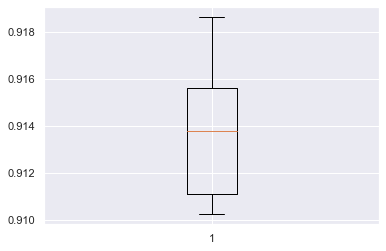

In [128]:
scoring='precision'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.91 to 0.9185 precision.
* check the performance on test data.

Accuracy on training set :  0.9021071321946544
Accuracy on test set :  0.9006085936354304
Recall on training set :  0.9063791915480018
Recall on test set :  0.9050840645723089
Precision on training set :  0.9140416907932831
Precision on test set :  0.9126029987842766


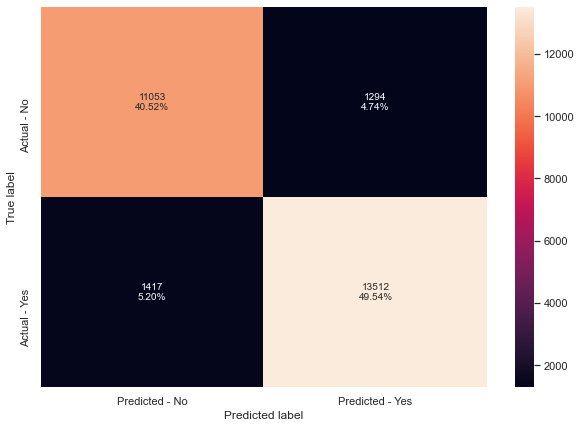

In [131]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

#### Observation
* Logistic Regression has given a high Precision score which compares nicely to the cv score as well.

**build different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**


In [109]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 92.54261197562222
Bagging: 95.68952992780835
RF: 95.72351911065905
ADB: 90.7684815013331
GBM: 92.86686823613823
XGB: 96.07816458063843


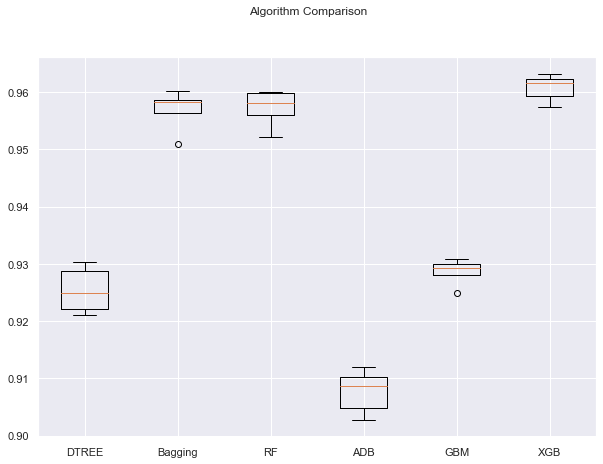

In [110]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax =  fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross validated precision followed by Random Forest.
- Let's tune these models see if the performance improves.

## Hyperparameter Tuning

* Use pipelines with StandardScaler with bagging and boosting models and tune them using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.


### Hyperparameter tuning Decision Tree

#### GridSearchCV

In [143]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_leaf_nodes': 2, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.9499564925366558
CPU times: user 43min 54s, sys: 10min 12s, total: 54min 6s
Wall time: 1h 58min 5s


In [114]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=2,
        max_leaf_nodes=2,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.6603918857340394
Accuracy on test set :  0.6559612846458425
Recall on training set :  0.4006086357372531
Recall on test set :  0.3899122513229285
Precision on training set :  0.9499625570154537
Precision on test set :  0.9547318353288503


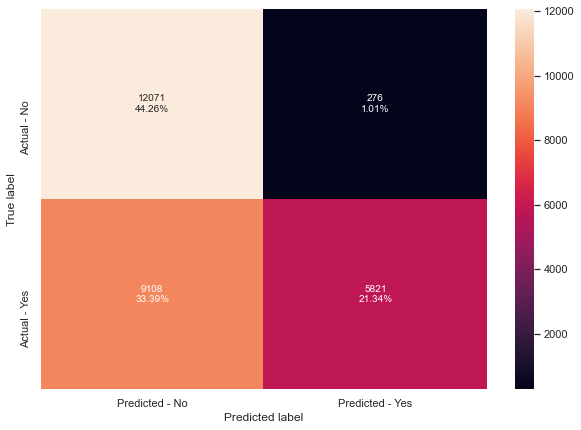

In [115]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- The test precision has increased by ~3% as compared to the result from cross validation with default parameters.


#### RandomizedSearchCV

In [147]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__max_leaf_nodes': 2, 'decisiontreeclassifier__max_depth': 25} with CV score=0.9499564925366558:
CPU times: user 42.7 s, sys: 10.5 s, total: 53.1 s
Wall time: 53.2 s


In [148]:
 # Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=25,
        max_leaf_nodes=2,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=7
    ),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=25, max_leaf_nodes=2,
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=7, random_state=1))])

Accuracy on training set :  0.6603918857340394
Accuracy on test set :  0.6559612846458425
Recall on training set :  0.4006086357372531
Recall on test set :  0.3899122513229285
Precision on training set :  0.9499625570154537
Precision on test set :  0.9547318353288503


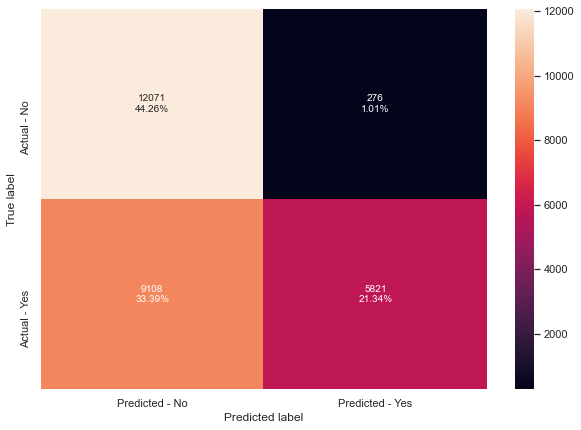

In [149]:
# Calculating different metrics
get_metrics_score(dtree_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  


### Hyperparameter tuning BaggingClassifier


#### GridSearchCV

In [111]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.8, 'baggingclassifier__n_estimators': 10} 
Score: 0.9635957742216184
CPU times: user 23min 21s, sys: 42.2 s, total: 24min 4s
Wall time: 30min 16s


In [112]:
# Creating new pipeline with best parameters
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.7,
        max_samples=0.7,
        random_state=1,
        n_estimators=50,
    ),
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.7, max_samples=0.7,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9986958093053221
Accuracy on test set :  0.9467297257662414
Recall on training set :  0.9978180983004135
Recall on test set :  0.9417911447518253
Precision on training set :  0.9997986364813164
Precision on test set :  0.9601201857416006


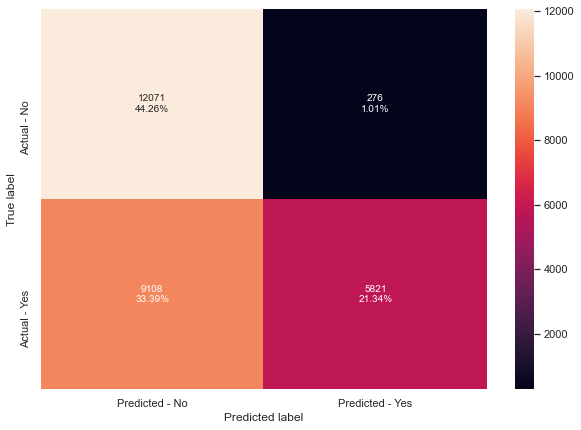

In [116]:
# Calculating different metrics
get_metrics_score(bagg_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

* model is overfitting wrt precision

#### RandomizedSearchCV

In [117]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 10, 'baggingclassifier__max_samples': 0.8, 'baggingclassifier__max_features': 0.9} with CV score=0.9635957742216184:
CPU times: user 14min 38s, sys: 34 s, total: 15min 12s
Wall time: 15min 20s


In [118]:
# Creating new pipeline with best parameters
bagg_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.9,
        random_state=1,
        max_samples=0.8,
        n_estimators=10
    ),
)

# Fit the model on training data
bagg_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.8,
                                   random_state=1))])

Accuracy on training set :  0.9945946795304913
Accuracy on test set :  0.9446766388033436
Recall on training set :  0.9913872301332108
Recall on test set :  0.9347578538415166
Precision on training set :  0.9987274409995373
Precision on test set :  0.9630779848171153


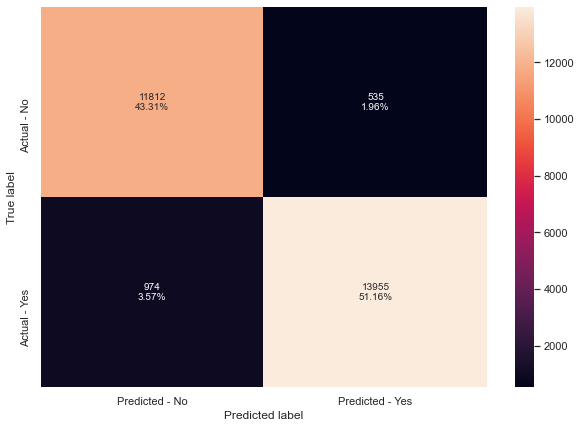

In [119]:
# Calculating different metrics
get_metrics_score(bagg_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bagg_tuned2, y_test)

* model is overfitting
* precision score is high

#### AUC ROC Curve

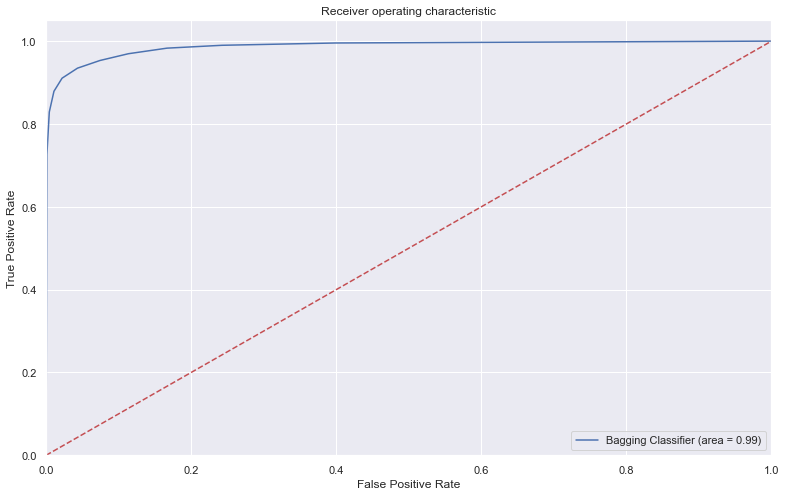

In [134]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, bagg_tuned2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, bagg_tuned2.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Bagg_ROC')
plt.show()

* 99% of the area is under the curve which is very good, probably overfitting.

### Hyperparameter tuning Random Forest


#### GridSearchCV

In [120]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_samples': 0.5000000000000001, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 150} 
Score: 0.954156992894115
CPU times: user 40min 41s, sys: 1min 4s, total: 41min 45s
Wall time: 41min 58s


In [124]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=150,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.5,
                                        n_estimators=150, random_state=1))])

Accuracy on training set :  0.9948775160666866
Accuracy on test set :  0.9434667839859217
Recall on training set :  0.9919901240238861
Recall on test set :  0.9429968517650211
Precision on training set :  0.9986416184971099
Precision on test set :  0.9532128106168326


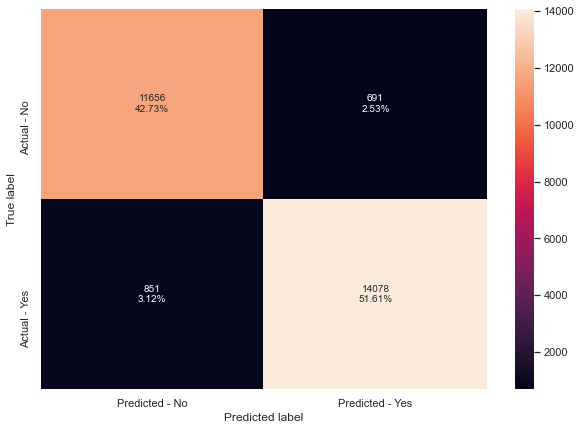

In [125]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- Precision score is high for both test and train data
- model is overfitting wrt the precision score.

#### RandomizedSearchCV


In [126]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_samples': 0.5000000000000001, 'randomforestclassifier__max_features': 'sqrt'} with CV score=0.954156992894115:
CPU times: user 10min 1s, sys: 17.4 s, total: 10min 18s
Wall time: 10min 21s


In [127]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=150,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.5,
                                        n_estimators=150, random_state=1))])

Accuracy on training set :  0.9948775160666866
Accuracy on test set :  0.9434667839859217
Recall on training set :  0.9919901240238861
Recall on test set :  0.9429968517650211
Precision on training set :  0.9986416184971099
Precision on test set :  0.9532128106168326


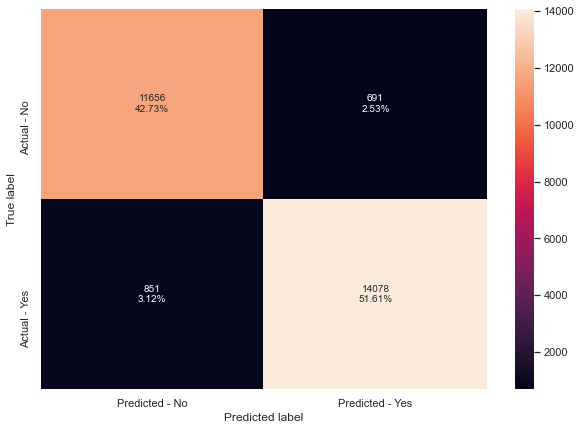

In [128]:
# Calculating different metrics
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Precision score is high for both test and train data
- model is overfitting wrt the precision score.

#### AUC ROC Curve

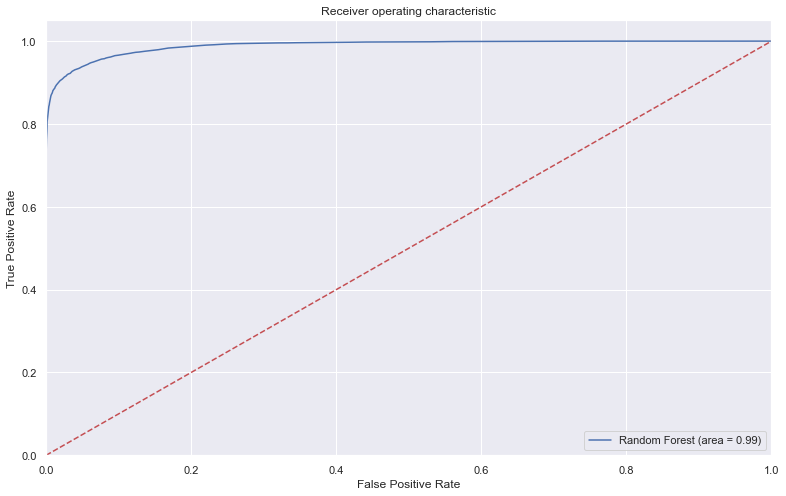

In [135]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, rf_tuned2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned2.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

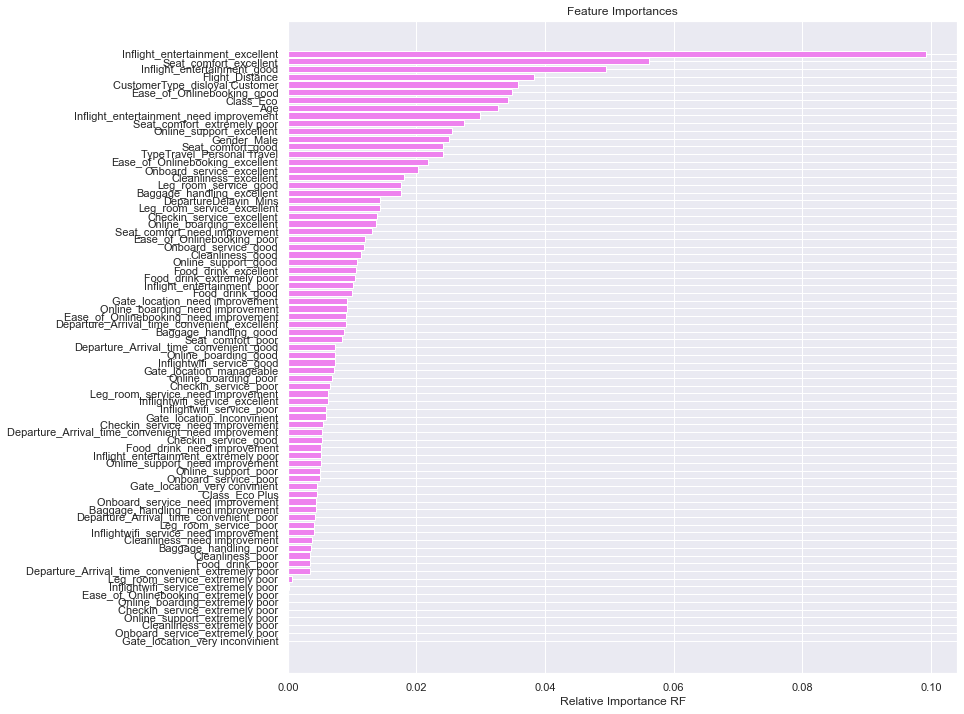

In [137]:
# feature impoortances with bagging classifier

feature_names = X_train.columns
importances = rf_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance RF")
plt.show()

### Hyperparameter tuning XGBoost


#### RandomizedSearchCV

In [147]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9580937030435696:
CPU times: user 3h 37min 32s, sys: 1min 33s, total: 3h 39min 5s
Wall time: 30min 17s


In [148]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=1,
                learning_rate=0.2,
                gamma=5,
                subsample=1,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9550289907449601
Accuracy on test set :  0.9455565332160141
Recall on training set :  0.9516823610473129
Recall on test set :  0.9414562261370487
Precision on training set :  0.9656548590072245
Precision on test set :  0.9583390154097914


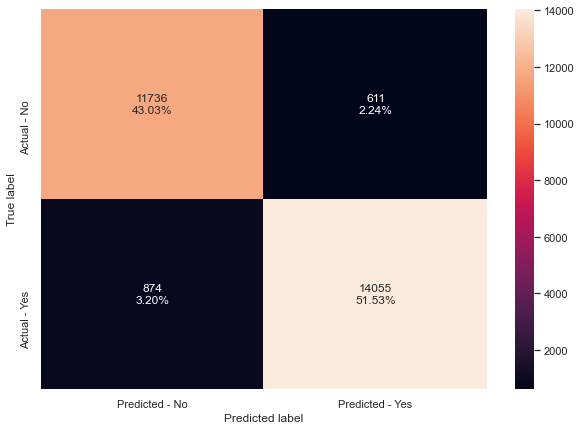

In [149]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

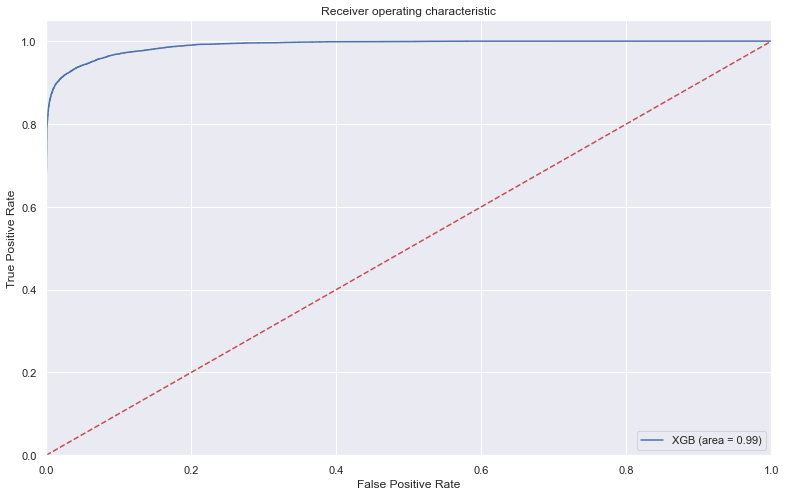

In [150]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, xgb_tuned2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned2.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

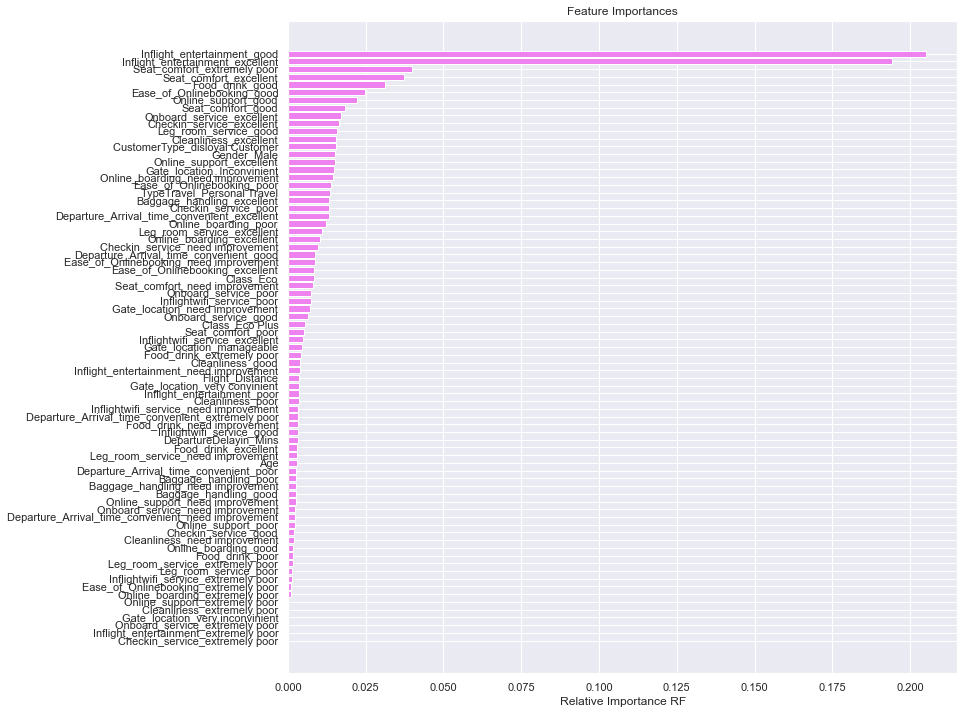

In [152]:
# feature impoortances with XGB model 

feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance RF")
plt.show()